# CoverQuick Data Analysis Project

In [5]:
# Loading necessary library 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [6]:
#Loading the csv file

df = pd.read_csv ('resume_with_job_description.csv')

In [7]:
df_clean = df

In [8]:
df.head(5)

,id,content,jobDescription
0,clg43d9an007gx02ug1i694j6,"{""awards"": {""awards"": []}, ""header"": {""role"": ...",Job Posting:\nDo you have a passion for helpin...
1,clg3itetj006jx92tdkcrw195,"{""awards"": {""awards"": []}, ""header"": {""role"": ...",Tasks:\n\nCreation of concepts for dashboard i...
2,clg3iy1sd007rx32utnuhnrgy,"{""awards"": {""awards"": [{""name"": ""Dean's List"",...",Responsibilities:\n\nWork closely with product...
3,clg5j15lz00k3x02uaau7g9z0,"{""awards"": {""awards"": []}, ""header"": {""role"": ...",What is Talentport :\n\nTalentport connects SE...
4,clg43pte600ddya2umakfw3c3,"{""awards"": {""awards"": []}, ""header"": {""role"": ...",Hyperproof is hiring a Product Manager with a ...


# Data Cleaning

In [9]:
df_clean['content'] = df['content'].apply(lambda x: json.loads(x))

In [10]:
# Expand the JSON data into separate columns
json_cols = pd.json_normalize(df_clean['content'])
df_clean = pd.concat([df, json_cols], axis=1)

In [11]:
# Export the DataFrame to a new CSV file
#df.to_csv('new_filename1.csv', index=False)

In [12]:
df_clean.head(5)

,id,content,jobDescription,keywords,suggestedSkills,awards.awards,header.role,header.contact.city,header.contact.state,header.contact.country,...,projects.projects,education.education,volunteer.volunteer,experience.experience,references.references,publications.publications,certifications.certifications,accomplishments.text,accomplishments.visible,accomplishments.diffedText
0,clg43d9an007gx02ug1i694j6,"{'awards': {'awards': []}, 'header': {'role': ...",Job Posting:\nDo you have a passion for helpin...,"[admissions representative, admissions, uma,...","[Compliance, Client, Manages, Interaction, Fin...",[],,INDIO,CA,United States,...,[],"[{'GPA': '', 'minor': '', 'awards': 'Dean's Li...",[],"[{'title': 'Lead IPM Technician III', 'company...",[],[],"[{'name': 'Qualified Applicator Certificate', ...",,True,
1,clg3itetj006jx92tdkcrw195,"{'awards': {'awards': []}, 'header': {'role': ...",Tasks:\n\nCreation of concepts for dashboard i...,"[dashboard interfaces, lead generation, mark...","[Analysis, Collection, Research]",[],,Ilmenau,Thuringia,Germany,...,"[{'link': '', 'title': 'Madinar Pathe App Desi...","[{'GPA': '', 'minor': '', 'awards': '', 'schoo...",[],"[{'title': 'UI/UX Designer', 'company': 'Dezzl...",[],[],[{'name': 'Google UX Design - Foundation of UX...,,True,
2,clg3iy1sd007rx32utnuhnrgy,"{'awards': {'awards': [{'name': ""Dean's List"",...",Responsibilities:\n\nWork closely with product...,"[product, design, development, business req...","[Vue, DevOps, Delivery]","[{'name': 'Dean's List', 'issuer': 'Arizona St...",,Peoria,Arizona,United States,...,"[{'link': '', 'title': 'AIO Financial Site', '...","[{'GPA': '3.61/4.00', 'minor': 'Computer Scien...",[],"[{'title': 'Software Engineer', 'company': 'Pa...",[],[],[],,True,
3,clg5j15lz00k3x02uaau7g9z0,"{'awards': {'awards': []}, 'header': {'role': ...",What is Talentport :\n\nTalentport connects SE...,"[flexibility, international exposure, dream ...",[],[],,Malang,,,...,[],"[{'GPA': '', 'minor': 'Digital Marketing', 'aw...",[],"[{'title': 'CRM Specialist', 'company': 'LandX...",[],[],[],,True,
4,clg43pte600ddya2umakfw3c3,"{'awards': {'awards': []}, 'header': {'role': ...",Hyperproof is hiring a Product Manager with a ...,"[product roadmaps, new features, product enh...",[Curiosity],[],,Calgary,AB,Canada,...,[],"[{'GPA': '', 'minor': '', 'awards': '', 'schoo...",[],"[{'title': 'Customer Support Specialist', 'com...",[],[],[{'name': 'Certified associate in project mana...,,True,


In [13]:
# dropping id, date and zipcode columns
df_clean = df_clean.drop(['content','summary.diffedText','id','header.role','references.references','accomplishments.text','accomplishments.visible','accomplishments.diffedText','awards.awards'], axis = 1)

In [14]:
#for i in df_clean['skills.skills']:
#    print(i)

In [15]:
#df_normalized = pd.json_normalize(df['skills.skills'])

In [16]:
#df_normalized

In [17]:
#Deriving only Skills (here, 'section') from multiple values
df_clean['Skills'] = df_clean['skills.skills'].apply(lambda x: [item['section'] for item in x])

In [18]:
df_clean.head(5)

,jobDescription,keywords,suggestedSkills,header.contact.city,header.contact.state,header.contact.country,skills.skills,summary.text,summary.visible,projects.projects,education.education,volunteer.volunteer,experience.experience,publications.publications,certifications.certifications,Skills
0,Job Posting:\nDo you have a passion for helpin...,"[admissions representative, admissions, uma,...","[Compliance, Client, Manages, Interaction, Fin...",INDIO,CA,United States,"[{'section': 'Jobber, Glorilladesk, Billmaster...","Detailed and driven, I have built strong commu...",True,[],"[{'GPA': '', 'minor': '', 'awards': 'Dean's Li...",[],"[{'title': 'Lead IPM Technician III', 'company...",[],"[{'name': 'Qualified Applicator Certificate', ...","[Jobber, Glorilladesk, Billmaster Software, As..."
1,Tasks:\n\nCreation of concepts for dashboard i...,"[dashboard interfaces, lead generation, mark...","[Analysis, Collection, Research]",Ilmenau,Thuringia,Germany,"[{'section': 'User research methodologies, Inf...",Detailed-oriented UI/UX Designer with experien...,True,"[{'link': '', 'title': 'Madinar Pathe App Desi...","[{'GPA': '', 'minor': '', 'awards': '', 'schoo...",[],"[{'title': 'UI/UX Designer', 'company': 'Dezzl...",[],[{'name': 'Google UX Design - Foundation of UX...,"[User research methodologies, Information arch..."
2,Responsibilities:\n\nWork closely with product...,"[product, design, development, business req...","[Vue, DevOps, Delivery]",Peoria,Arizona,United States,"[{'section': 'JavaScript, React, Cypress, SQL,...",Agile Software Engineer with 2 years of experi...,True,"[{'link': '', 'title': 'AIO Financial Site', '...","[{'GPA': '3.61/4.00', 'minor': 'Computer Scien...",[],"[{'title': 'Software Engineer', 'company': 'Pa...",[],[],"[JavaScript, React, Cypress, SQL, C#, PHP, Pyt..."
3,What is Talentport :\n\nTalentport connects SE...,"[flexibility, international exposure, dream ...",[],Malang,,,"[{'section': 'Marketing Analytics, Website Ana...",Innovative digital marketing professional with...,True,[],"[{'GPA': '', 'minor': 'Digital Marketing', 'aw...",[],"[{'title': 'CRM Specialist', 'company': 'LandX...",[],[],"[Marketing Analytics, Website Analytics, Produ..."
4,Hyperproof is hiring a Product Manager with a ...,"[product roadmaps, new features, product enh...",[Curiosity],Calgary,AB,Canada,"[{'section': 'Client relations, interpersonal ...",Passionate job seeker with strong organization...,True,[],"[{'GPA': '', 'minor': '', 'awards': '', 'schoo...",[],"[{'title': 'Customer Support Specialist', 'com...",[],[{'name': 'Certified associate in project mana...,"[Client relations, interpersonal communication..."


In [19]:
df_clean.columns

Index(['jobDescription', 'keywords', 'suggestedSkills', 'header.contact.city',
       'header.contact.state', 'header.contact.country', 'skills.skills',
       'summary.text', 'summary.visible', 'projects.projects',
       'education.education', 'volunteer.volunteer', 'experience.experience',
       'publications.publications', 'certifications.certifications', 'Skills'],
      dtype='object')

In [20]:
# dropping unwanted columns
df_clean = df_clean.drop(['skills.skills'], axis = 1)

In [21]:
# Remove square brackets from the values in the Skills column
df_clean['Skills'] = df_clean['Skills'].astype(str)
df_clean['Skills'] = df_clean['Skills'].str.replace('[', '').str.replace(']', '')

C:\Users\gunja\AppData\Local\Temp\ipykernel_4628\783515583.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_clean['Skills'] = df_clean['Skills'].str.replace('[', '').str.replace(']', '')


In [22]:
#code need to be fixed
def extract_experience(row1):
    if isinstance(row1, list) and len(row1) > 0:
        return row1[0].get('title'), row1[0].get('company'), row1[0].get('endDate'), row1[0].get('visible'), row1[0].get('location'), row1[0].get('startDate'), row1[0].get('description')
    else:
        return None, None, None, None, None, None, None

In [23]:
df_clean[['title', 'company', 'endDate', 'visible', 'location', 'startDate', 'description']] = df_clean['experience.experience'].apply(extract_experience).apply(pd.Series)

In [24]:
df_clean.head(5)

,jobDescription,keywords,suggestedSkills,header.contact.city,header.contact.state,header.contact.country,summary.text,summary.visible,projects.projects,education.education,...,publications.publications,certifications.certifications,Skills,title,company,endDate,visible,location,startDate,description
0,Job Posting:\nDo you have a passion for helpin...,"[admissions representative, admissions, uma,...","[Compliance, Client, Manages, Interaction, Fin...",INDIO,CA,United States,"Detailed and driven, I have built strong commu...",True,[],"[{'GPA': '', 'minor': '', 'awards': 'Dean's Li...",...,[],"[{'name': 'Qualified Applicator Certificate', ...","'Jobber, Glorilladesk, Billmaster Software, As...",Lead IPM Technician III,Canndescent,November 2022,True,"Desert Hot Springs, CA",November 2021,• Ensures timely submission of all required re...
1,Tasks:\n\nCreation of concepts for dashboard i...,"[dashboard interfaces, lead generation, mark...","[Analysis, Collection, Research]",Ilmenau,Thuringia,Germany,Detailed-oriented UI/UX Designer with experien...,True,"[{'link': '', 'title': 'Madinar Pathe App Desi...","[{'GPA': '', 'minor': '', 'awards': '', 'schoo...",...,[],[{'name': 'Google UX Design - Foundation of UX...,"'User research methodologies, Information arch...",UI/UX Designer,Dezzlab Ltd,September 2021,True,"Dhaka, Bangladesh",April 2020,• Standardized best practices for desirable ou...
2,Responsibilities:\n\nWork closely with product...,"[product, design, development, business req...","[Vue, DevOps, Delivery]",Peoria,Arizona,United States,Agile Software Engineer with 2 years of experi...,True,"[{'link': '', 'title': 'AIO Financial Site', '...","[{'GPA': '3.61/4.00', 'minor': 'Computer Scien...",...,[],[],"'JavaScript, React, Cypress, SQL, C#, PHP, Pyt...",Software Engineer,PayGround Inc.,December 2022,True,"Gilbert, AZ",November 2021,• Tested and developed tier 3 production suppo...
3,What is Talentport :\n\nTalentport connects SE...,"[flexibility, international exposure, dream ...",[],Malang,,,Innovative digital marketing professional with...,True,[],"[{'GPA': '', 'minor': 'Digital Marketing', 'aw...",...,[],[],"'Marketing Analytics, Website Analytics, Produ...",CRM Specialist,LandX,December 2022,True,Jakarta,September 2022,• Coordinated top-level CRM strategy and best ...
4,Hyperproof is hiring a Product Manager with a ...,"[product roadmaps, new features, product enh...",[Curiosity],Calgary,AB,Canada,Passionate job seeker with strong organization...,True,[],"[{'GPA': '', 'minor': '', 'awards': '', 'schoo...",...,[],[{'name': 'Certified associate in project mana...,"'Client relations, interpersonal communication...",Customer Support Specialist,Cuboh Software,Present,True,,June 2022,• Assisted Customers in developing product roa...


In [25]:
df_clean['education.education'][2534]

[{'GPA': '4.8 out of 5',
  'minor': 'Applied Informatics in Design',
  'awards': '',
  'school': 'Saint Petersburg State Polytechnical University',
  'program': 'Specialist',
  'visible': True,
  'location': 'Saint Petersburg',
  'courseWork': '',
  'graduationDate': ''}]

In [26]:
column_mapping = {
    'title' : 'Exp_job_title',
    'location': 'Exp_location',
    'description': 'Exp_description',
    'endDate' : 'Exp_end_date',
    'startDate' : 'Exp_start_date'
}

In [27]:
df_clean = df_clean.rename(columns=column_mapping)

In [28]:
#error need to be fixed
df_clean['GPA'] = df_clean['education.education'].apply(lambda x: [item['GPA'] for item in x])
df_clean['School'] = df_clean['education.education'].apply(lambda x: [item['school'] for item in x])
df_clean['Program'] = df_clean['education.education'].apply(lambda x: [item['program'] for item in x])
df_clean['GraduationDate'] = df_clean['education.education'].apply(lambda x: [item['graduationDate'] for item in x])
df_clean['CourseWork'] = df_clean['education.education'].apply(lambda x: [item['courseWork'] for item in x])

In [29]:
df_clean['GPA'] = df_clean['GPA'].astype(str)
df_clean['GPA'] = df_clean['GPA'].str.replace('[', '').str.replace(']', '')
df_clean['School'] = df_clean['School'].astype(str)
df_clean['School'] = df_clean['School'].str.replace('[', '').str.replace(']', '')
df_clean['Program'] = df_clean['Program'].astype(str)
df_clean['Program'] = df_clean['Program'].str.replace('[', '').str.replace(']', '')
df_clean['GraduationDate'] = df_clean['GraduationDate'].astype(str)
df_clean['GraduationDate'] = df_clean['GraduationDate'].str.replace('[', '').str.replace(']', '')
df_clean['CourseWork'] = df_clean['CourseWork'].astype(str)
df_clean['CourseWork'] = df_clean['CourseWork'].str.replace('[', '').str.replace(']', '')

C:\Users\gunja\AppData\Local\Temp\ipykernel_4628\764421042.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_clean['GPA'] = df_clean['GPA'].str.replace('[', '').str.replace(']', '')
C:\Users\gunja\AppData\Local\Temp\ipykernel_4628\764421042.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_clean['School'] = df_clean['School'].str.replace('[', '').str.replace(']', '')
C:\Users\gunja\AppData\Local\Temp\ipykernel_4628\764421042.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_clean['Program'] = df_clean['Pro

In [30]:
df_clean = df_clean.drop(['education.education'], axis = 1)

In [31]:
def extract_values(row):
    if isinstance(row, list) and len(row) > 0:
        return row[0].get('name'), row[0].get('issuer'), row[0].get('visible'), row[0].get('dateReceived')
    else:
        return None, None, None, None

In [32]:
df_clean[['name', 'issuer', 'visible', 'dateReceived']] = df_clean['certifications.certifications'].apply(extract_values).apply(pd.Series)

In [33]:
df_clean.head(5)

,jobDescription,keywords,suggestedSkills,header.contact.city,header.contact.state,header.contact.country,summary.text,summary.visible,projects.projects,volunteer.volunteer,...,Exp_start_date,Exp_description,GPA,School,Program,GraduationDate,CourseWork,name,issuer,dateReceived
0,Job Posting:\nDo you have a passion for helpin...,"[admissions representative, admissions, uma,...","[Compliance, Client, Manages, Interaction, Fin...",INDIO,CA,United States,"Detailed and driven, I have built strong commu...",True,[],[],...,November 2021,• Ensures timely submission of all required re...,'','Cal Poly Pomona','Business Management and Human Resources','June 2019','',Qualified Applicator Certificate,California Riverside Agriculture Department,November 2021
1,Tasks:\n\nCreation of concepts for dashboard i...,"[dashboard interfaces, lead generation, mark...","[Analysis, Collection, Research]",Ilmenau,Thuringia,Germany,Detailed-oriented UI/UX Designer with experien...,True,"[{'link': '', 'title': 'Madinar Pathe App Desi...",[],...,April 2020,• Standardized best practices for desirable ou...,"'', ''","'TU Ilmenau', 'BRAC University'","""Master's in Media Technology "", 'Electrical &...","'September 2024', 'April 2017'","'Crowdsourcing & Human Computing, User-Centric...",Google UX Design - Foundation of UX Design,Google,May 2022
2,Responsibilities:\n\nWork closely with product...,"[product, design, development, business req...","[Vue, DevOps, Delivery]",Peoria,Arizona,United States,Agile Software Engineer with 2 years of experi...,True,"[{'link': '', 'title': 'AIO Financial Site', '...",[],...,November 2021,• Tested and developed tier 3 production suppo...,'3.61/4.00','Arizona State University','Bachelor of Science','December 2020',"'Distributed Software Development, Algorithms ...",None,None,None
3,What is Talentport :\n\nTalentport connects SE...,"[flexibility, international exposure, dream ...",[],Malang,,,Innovative digital marketing professional with...,True,[],[],...,September 2022,• Coordinated top-level CRM strategy and best ...,"'', '3.58'","'RevoU', 'Malang State Polytechnic'","'Full Stack Digital Marketing', 'Bachelor of A...","'April 2021', 'September 2020'","'Marketing Analytics, Product Marketing, Googl...",None,None,None
4,Hyperproof is hiring a Product Manager with a ...,"[product roadmaps, new features, product enh...",[Curiosity],Calgary,AB,Canada,Passionate job seeker with strong organization...,True,[],[],...,June 2022,• Assisted Customers in developing product roa...,'','University of British Columbia','Bachelors of Arts- Geography','June 2021','',Certified associate in project management (CAPM)®,Project Management Institute,May 2022


In [34]:
df_clean = df_clean.drop(['certifications.certifications','visible'], axis =1)

In [35]:
column_mapping = {
    'name': 'Certificate Name',
    'issuer': 'Certificate Issuer',
    'dateReceived': 'Certificate Received on',
}

In [36]:
df_clean = df_clean.rename(columns=column_mapping)

In [37]:
df_clean.head(5)

,jobDescription,keywords,suggestedSkills,header.contact.city,header.contact.state,header.contact.country,summary.text,summary.visible,projects.projects,volunteer.volunteer,...,Exp_start_date,Exp_description,GPA,School,Program,GraduationDate,CourseWork,Certificate Name,Certificate Issuer,Certificate Received on
0,Job Posting:\nDo you have a passion for helpin...,"[admissions representative, admissions, uma,...","[Compliance, Client, Manages, Interaction, Fin...",INDIO,CA,United States,"Detailed and driven, I have built strong commu...",True,[],[],...,November 2021,• Ensures timely submission of all required re...,'','Cal Poly Pomona','Business Management and Human Resources','June 2019','',Qualified Applicator Certificate,California Riverside Agriculture Department,November 2021
1,Tasks:\n\nCreation of concepts for dashboard i...,"[dashboard interfaces, lead generation, mark...","[Analysis, Collection, Research]",Ilmenau,Thuringia,Germany,Detailed-oriented UI/UX Designer with experien...,True,"[{'link': '', 'title': 'Madinar Pathe App Desi...",[],...,April 2020,• Standardized best practices for desirable ou...,"'', ''","'TU Ilmenau', 'BRAC University'","""Master's in Media Technology "", 'Electrical &...","'September 2024', 'April 2017'","'Crowdsourcing & Human Computing, User-Centric...",Google UX Design - Foundation of UX Design,Google,May 2022
2,Responsibilities:\n\nWork closely with product...,"[product, design, development, business req...","[Vue, DevOps, Delivery]",Peoria,Arizona,United States,Agile Software Engineer with 2 years of experi...,True,"[{'link': '', 'title': 'AIO Financial Site', '...",[],...,November 2021,• Tested and developed tier 3 production suppo...,'3.61/4.00','Arizona State University','Bachelor of Science','December 2020',"'Distributed Software Development, Algorithms ...",None,None,None
3,What is Talentport :\n\nTalentport connects SE...,"[flexibility, international exposure, dream ...",[],Malang,,,Innovative digital marketing professional with...,True,[],[],...,September 2022,• Coordinated top-level CRM strategy and best ...,"'', '3.58'","'RevoU', 'Malang State Polytechnic'","'Full Stack Digital Marketing', 'Bachelor of A...","'April 2021', 'September 2020'","'Marketing Analytics, Product Marketing, Googl...",None,None,None
4,Hyperproof is hiring a Product Manager with a ...,"[product roadmaps, new features, product enh...",[Curiosity],Calgary,AB,Canada,Passionate job seeker with strong organization...,True,[],[],...,June 2022,• Assisted Customers in developing product roa...,'','University of British Columbia','Bachelors of Arts- Geography','June 2021','',Certified associate in project management (CAPM)®,Project Management Institute,May 2022


In [38]:
df_clean['header.contact.city']

0           INDIO
1         Ilmenau
2          Peoria
3          Malang
4         Calgary
           ...   
11971    Brooklyn
11972     Peabody
11973     Crivitz
11974     Peabody
11975     Peabody
Name: header.contact.city, Length: 11976, dtype: object

In [39]:
#Export the DataFrame to a new CSV file
df_clean.to_csv('Clean_Dataset.csv', index=False)

In [40]:
df_clean.head(2)

,jobDescription,keywords,suggestedSkills,header.contact.city,header.contact.state,header.contact.country,summary.text,summary.visible,projects.projects,volunteer.volunteer,...,Exp_start_date,Exp_description,GPA,School,Program,GraduationDate,CourseWork,Certificate Name,Certificate Issuer,Certificate Received on
0,Job Posting:\nDo you have a passion for helpin...,"[admissions representative, admissions, uma,...","[Compliance, Client, Manages, Interaction, Fin...",INDIO,CA,United States,"Detailed and driven, I have built strong commu...",True,[],[],...,November 2021,• Ensures timely submission of all required re...,'','Cal Poly Pomona','Business Management and Human Resources','June 2019','',Qualified Applicator Certificate,California Riverside Agriculture Department,November 2021
1,Tasks:\n\nCreation of concepts for dashboard i...,"[dashboard interfaces, lead generation, mark...","[Analysis, Collection, Research]",Ilmenau,Thuringia,Germany,Detailed-oriented UI/UX Designer with experien...,True,"[{'link': '', 'title': 'Madinar Pathe App Desi...",[],...,April 2020,• Standardized best practices for desirable ou...,"'', ''","'TU Ilmenau', 'BRAC University'","""Master's in Media Technology "", 'Electrical &...","'September 2024', 'April 2017'","'Crowdsourcing & Human Computing, User-Centric...",Google UX Design - Foundation of UX Design,Google,May 2022


# Research Q1: Top 3 Industries

In [61]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gunja\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [42]:
# Convert lists to strings
df_clean['keywords'] = df_clean['keywords'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
df_clean['suggestedSkills'] = df_clean['suggestedSkills'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

In [43]:
df_clean['text_data'] = df_clean['keywords'] + ' ' + df_clean['suggestedSkills']

In [44]:
# Fill NaN values with an empty string
df_clean['text_data'] = df_clean['text_data'].fillna('')

In [45]:
vectorizer = CountVectorizer()
dtm = vectorizer.fit_transform(df_clean['text_data'])

In [46]:
num_topics = 10
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(dtm)

LatentDirichletAllocation(random_state=42)

In [47]:
dominant_topics = []
for i, document in enumerate(dtm):
    topic = lda.transform(document.reshape(1, -1)).argmax()
    dominant_topics.append(topic)

In [48]:
df_clean['dominant_topic'] = dominant_topics

In [49]:
top_industries = df_clean['dominant_topic'].value_counts().nlargest(3).index

In [50]:
for industry in top_industries:
    print("Industry:", industry)

Industry: 0
Industry: 6
Industry: 1


In [51]:
df_clean.head(50)

,jobDescription,keywords,suggestedSkills,header.contact.city,header.contact.state,header.contact.country,summary.text,summary.visible,projects.projects,volunteer.volunteer,...,GPA,School,Program,GraduationDate,CourseWork,Certificate Name,Certificate Issuer,Certificate Received on,text_data,dominant_topic
0,Job Posting:\nDo you have a passion for helpin...,admissions representative admissions uma in...,Compliance Client Manages Interaction Finance ...,INDIO,CA,United States,"Detailed and driven, I have built strong commu...",True,[],[],...,'','Cal Poly Pomona','Business Management and Human Resources','June 2019','',Qualified Applicator Certificate,California Riverside Agriculture Department,November 2021,admissions representative admissions uma in...,6
1,Tasks:\n\nCreation of concepts for dashboard i...,dashboard interfaces lead generation marketi...,Analysis Collection Research,Ilmenau,Thuringia,Germany,Detailed-oriented UI/UX Designer with experien...,True,"[{'link': '', 'title': 'Madinar Pathe App Desi...",[],...,"'', ''","'TU Ilmenau', 'BRAC University'","""Master's in Media Technology "", 'Electrical &...","'September 2024', 'April 2017'","'Crowdsourcing & Human Computing, User-Centric...",Google UX Design - Foundation of UX Design,Google,May 2022,dashboard interfaces lead generation marketi...,0
2,Responsibilities:\n\nWork closely with product...,product design development business require...,Vue DevOps Delivery,Peoria,Arizona,United States,Agile Software Engineer with 2 years of experi...,True,"[{'link': '', 'title': 'AIO Financial Site', '...",[],...,'3.61/4.00','Arizona State University','Bachelor of Science','December 2020',"'Distributed Software Development, Algorithms ...",None,None,None,product design development business require...,0
3,What is Talentport :\n\nTalentport connects SE...,flexibility international exposure dream job...,,Malang,,,Innovative digital marketing professional with...,True,[],[],...,"'', '3.58'","'RevoU', 'Malang State Polytechnic'","'Full Stack Digital Marketing', 'Bachelor of A...","'April 2021', 'September 2020'","'Marketing Analytics, Product Marketing, Googl...",None,None,None,flexibility international exposure dream job...,5
4,Hyperproof is hiring a Product Manager with a ...,product roadmaps new features product enhanc...,Curiosity,Calgary,AB,Canada,Passionate job seeker with strong organization...,True,[],[],...,'','University of British Columbia','Bachelors of Arts- Geography','June 2021','',Certified associate in project management (CAPM)®,Project Management Institute,May 2022,product roadmaps new features product enhanc...,0
5,Requirements\n1 or more years experience in a ...,cold outreach c-level executives lead source...,grad,Toronto,ONTARIO,Canada,"Strong-willed and highly driven, I possess a g...",True,"[{'link': '', 'title': 'Shark Tank Project', '...","[{'title': 'Area Leader ', 'endDate': 'March 2...",...,'','University of Toronto Scarborough','BBA ','May 2025',"'Marketing, Accounting, Communication, Statist...",None,None,None,cold outreach c-level executives lead source...,0
6,Deliver classroom and field-based training to ...,training kpis training manager technology-b...,Training Collect,Nairobi,NAIROBI,Kenya,Highly resourceful IT and Records Management a...,True,[],[],...,,,,,,None,None,None,training kpis training manager technology-b...,2
7,WHAT WILL I BE DOING?\n\nData Management\n\nHe...,configuring maintaining communicating respo...,Sales Research Data Management Benchmark Opera...,,Florida,United States,Supportive Customer Support Specialist with 5+...,True,[],[],...,'','University of Central Florida','English Language Arts Ed','','',TEFL Certificate,University of Central Florida,,configuring maintaining communicating respo...,0
8,Credit Acceptance is proud to be an award-winn...,training development organizational health ...,,Nashville,Tennessee,,Strategic Human Resources Business Partner wit...,True,[],[],...,"'', ''","'Purdue University', 'Capella University'","

In [52]:
#Export the DataFrame to a new CSV file
df_clean.to_csv('Clean_Dataset_with_top_Industries.csv', index=False)

In [53]:
# Print the industry names after analyzing numerical values in dataset

print("Top 3 Industries where candidates are applying jobs:\n\n 0 : IT and Software \n 6 : Sales and Marketting \n 1 : Finance")

Top 3 Industries where candidates are applying jobs:

 0 : IT and Software 
 6 : Sales and Marketting 
 1 : Finance


In [54]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import string

In [55]:
# Download stopwords if not already downloaded
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gunja\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [56]:
# Filter the dataframe for dominant topics 0, 6, and 1
filtered_df = df_clean[df_clean['dominant_topic'].isin([0, 6, 1])]

In [57]:
# Create a set of stopwords
stop_words = set(stopwords.words('english'))

In [58]:
# Additional words to ignore
ignore_words = set(["•","product", "customer", "business", "skills", "user", "team", "experience", "english", "success"])  # Add more words as needed

# Add ignore words to stop words set
stop_words.update(ignore_words)

In [59]:
# Initialize empty dictionaries to store word frequencies for each topic
topic_keywords_freq = {}
topic_skills_freq = {}

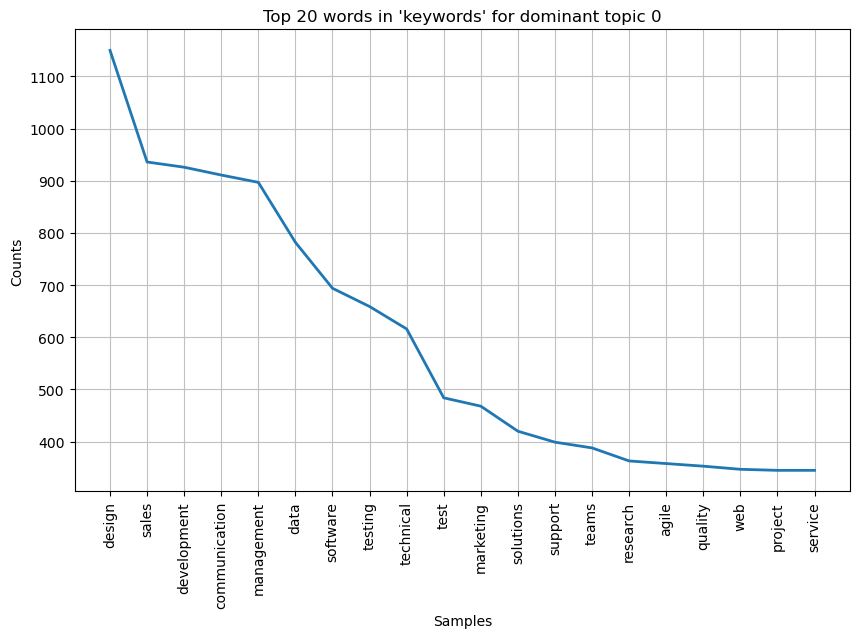

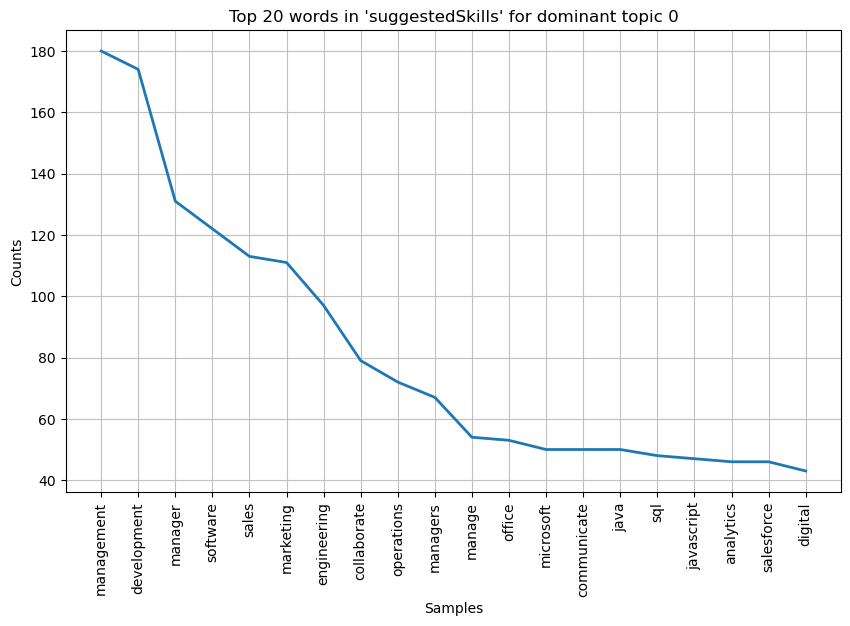

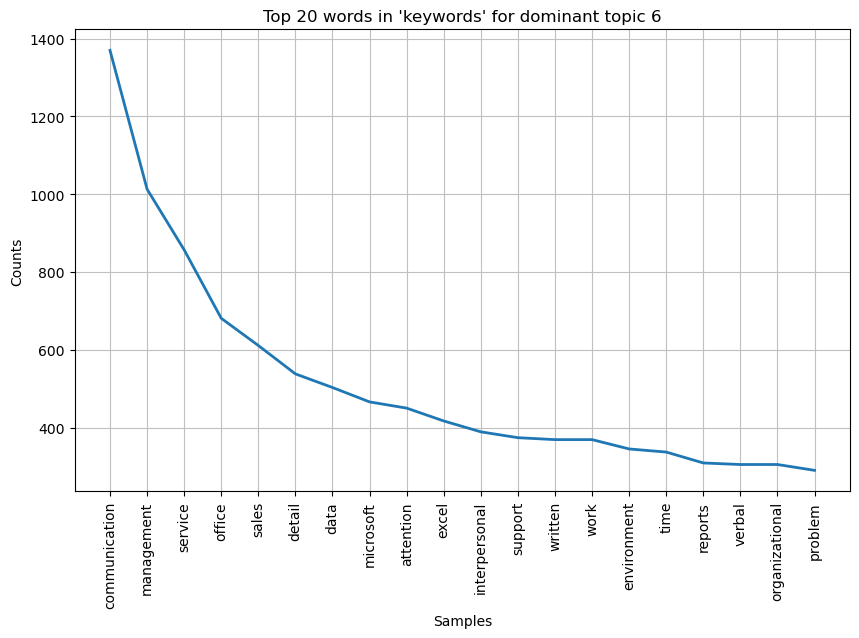

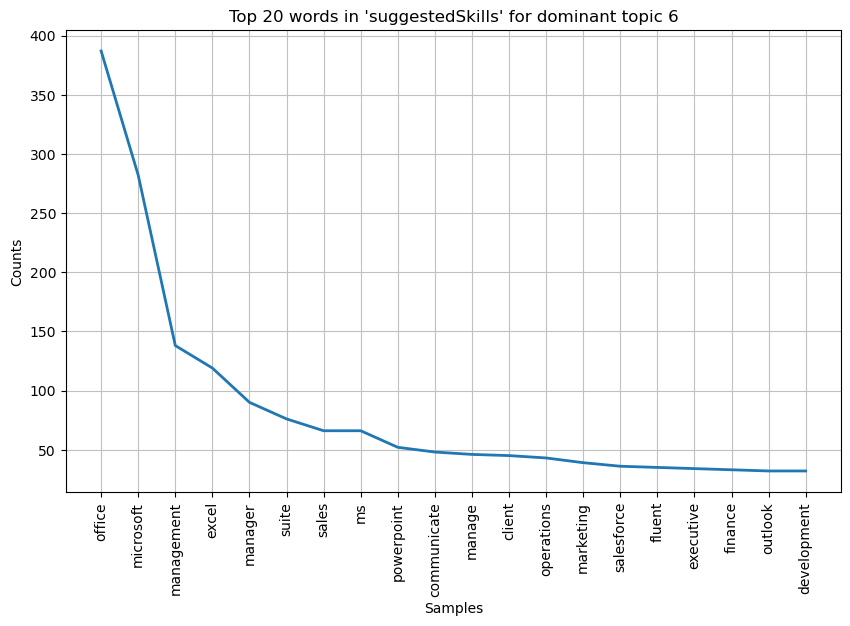

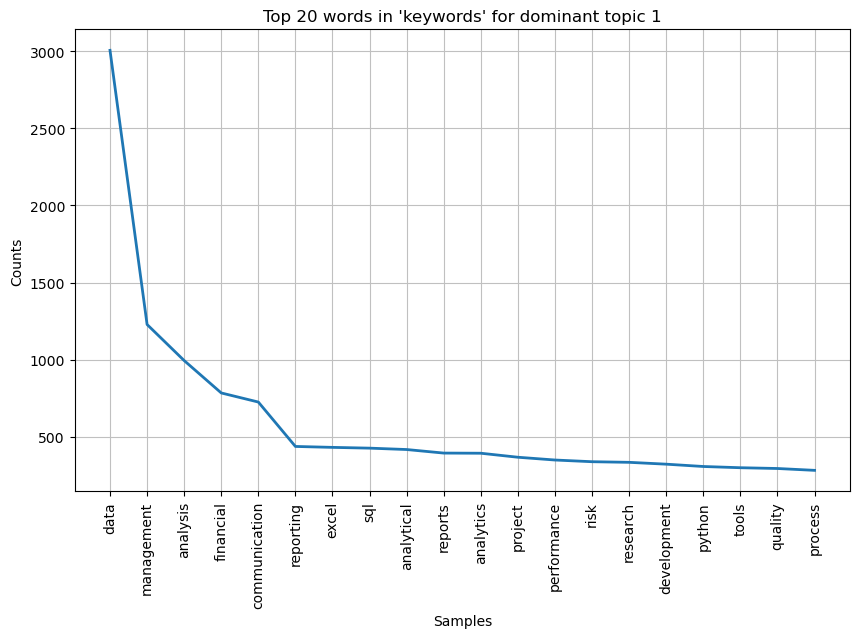

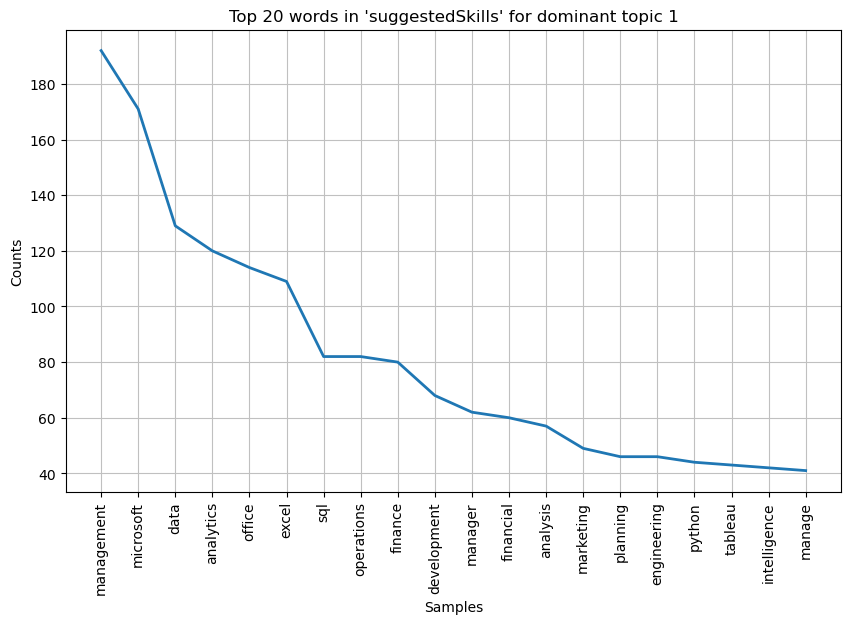

In [62]:
# Process keywords and suggestedSkills for each dominant topic
for topic in [0, 6, 1]:
    # Filter the dataframe for the current topic
    topic_df = filtered_df[filtered_df['dominant_topic'] == topic]
    
    # Concatenate all the keywords and suggestedSkills into a single string
    keywords_text = ' '.join(topic_df['keywords'].astype(str).tolist())
    skills_text = ' '.join(topic_df['suggestedSkills'].astype(str).tolist())
    
    # Remove punctuation
    keywords_text = keywords_text.translate(str.maketrans('', '', string.punctuation))
    skills_text = skills_text.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenize the text
    keywords_tokens = word_tokenize(keywords_text)
    skills_tokens = word_tokenize(skills_text)
    
    # Remove stopwords and convert tokens to lowercase
    keywords_tokens = [token.lower() for token in keywords_tokens if token.lower() not in stop_words]
    skills_tokens = [token.lower() for token in skills_tokens if token.lower() not in stop_words]
    
    # Count the occurrences of each word
    keywords_freq = nltk.FreqDist(keywords_tokens)
    skills_freq = nltk.FreqDist(skills_tokens)
    
    # Store the word frequencies for the current topic
    topic_keywords_freq[topic] = keywords_freq
    topic_skills_freq[topic] = skills_freq
    
    # Plot the frequency distribution for keywords
    plt.figure(figsize=(10, 6))
    keywords_freq.plot(20, title=f"Top 20 words in 'keywords' for dominant topic {topic}")
    plt.show()
    
    # Plot the frequency distribution for suggestedSkills
    plt.figure(figsize=(10, 6))
    skills_freq.plot(20, title=f"Top 20 words in 'suggestedSkills' for dominant topic {topic}")
    plt.show()

In [63]:
# Print the top 10 words for each topic
for topic in [0, 6, 1]:
    print(f"Top 10 words in 'keywords' for dominant topic {topic}:")
    print(topic_keywords_freq[topic].most_common(10))
    print(f"\nTop 10 words in 'suggestedSkills' for dominant topic {topic}:")
    print(topic_skills_freq[topic].most_common(10))
    print()

Top 10 words in 'keywords' for dominant topic 0:
[('design', 1150), ('sales', 936), ('development', 926), ('communication', 911), ('management', 897), ('data', 782), ('software', 694), ('testing', 659), ('technical', 616), ('test', 484)]

Top 10 words in 'suggestedSkills' for dominant topic 0:
[('management', 180), ('development', 174), ('manager', 131), ('software', 122), ('sales', 113), ('marketing', 111), ('engineering', 97), ('collaborate', 79), ('operations', 72), ('managers', 67)]

Top 10 words in 'keywords' for dominant topic 6:
[('communication', 1370), ('management', 1013), ('service', 857), ('office', 681), ('sales', 611), ('detail', 538), ('data', 503), ('microsoft', 466), ('attention', 450), ('excel', 417)]

Top 10 words in 'suggestedSkills' for dominant topic 6:
[('office', 387), ('microsoft', 282), ('management', 138), ('excel', 119), ('manager', 90), ('suite', 76), ('sales', 66), ('ms', 66), ('powerpoint', 52), ('communicate', 48)]

Top 10 words in 'keywords' for dominan

# Research Q3: Age range and experience level

In [64]:
import datetime

In [65]:
column_type = df_clean['GraduationDate'].dtype
print(column_type)

object


In [66]:
df_clean['Gyear'] = df_clean['GraduationDate'].str[-5:-1]

In [67]:
df_clean['Gyear']

0        2019
1        2017
2        2020
3        2020
4        2021
         ... 
11971    2009
11972    2020
11973    2015
11974    2020
11975    2020
Name: Gyear, Length: 11976, dtype: object

In [68]:
df_clean['Gyear'] = df_clean['Gyear'].apply(lambda x: int(x) if x.isdigit() else 0)

In [69]:
df_clean['Gyear']

0        2019
1        2017
2        2020
3        2020
4        2021
         ... 
11971    2009
11972    2020
11973    2015
11974    2020
11975    2020
Name: Gyear, Length: 11976, dtype: int64

In [70]:
df_clean['YearDifference'] = 2023 - df_clean['Gyear']

In [71]:
df_clean['YearDifference']

0         4
1         6
2         3
3         3
4         2
         ..
11971    14
11972     3
11973     8
11974     3
11975     3
Name: YearDifference, Length: 11976, dtype: int64

In [72]:
# we suppose each person has the age of 21 after graduation
df_clean['age']= 21 + df_clean['YearDifference']

In [73]:
df_clean['age']

0        25
1        27
2        24
3        24
4        23
         ..
11971    35
11972    24
11973    29
11974    24
11975    24
Name: age, Length: 11976, dtype: int64

In [74]:
age_counts = df_clean['age'].value_counts()
print(age_counts)

 2044    3140
 22      1159
 21      1114
 23       637
 29       636
 27       627
 24       625
 28       615
 25       562
 26       486
 20       453
 31       345
 30       313
 33       234
 19       218
 32       185
 43        95
 18        82
 36        81
 34        64
 35        58
 42        53
 38        50
 37        25
 39        24
 40        23
 17        19
 50        14
 41        11
 47         8
 45         6
 53         4
-275        2
 63         2
 44         1
 48         1
 67         1
 51         1
 52         1
-171        1
Name: age, dtype: int64


In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

In [76]:
# Filter the dataframe to include values in the range of 20 to 60
filtered_df = df_clean[(df_clean['age'] >= 20) & (df_clean['age'] <= 60)]

In [77]:
# Calculate age counts and store in a separate column
age_counts = filtered_df['age'].value_counts().sort_index()

In [78]:
average_age = filtered_df['age'].mean()
average_age

25.95781929268006

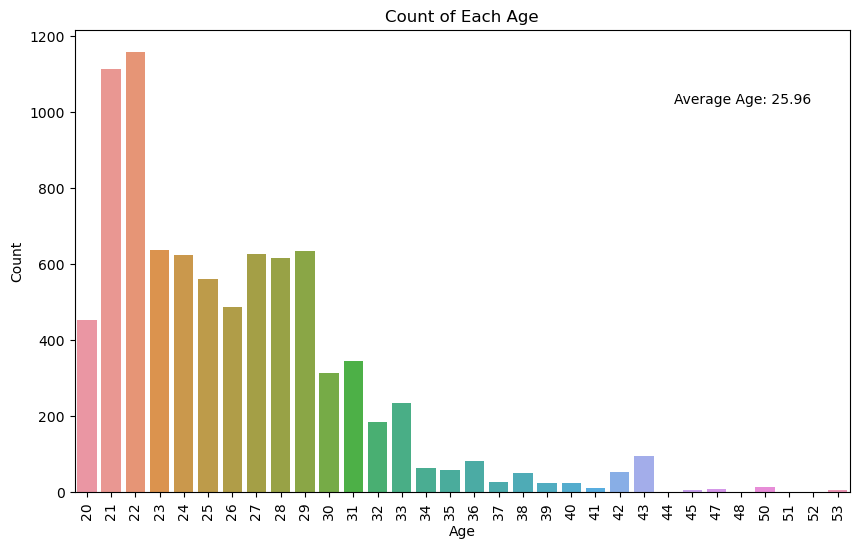

In [79]:
# Plot the result
plt.figure(figsize=(10, 6))
sns.barplot(x=age_counts.index, y=age_counts.values)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Count of Each Age')
plt.text(0.95, 0.85, f'Average Age: {average_age:.2f}', ha='right', va='center', transform=plt.gca().transAxes)
plt.xticks(rotation=90)
plt.show()

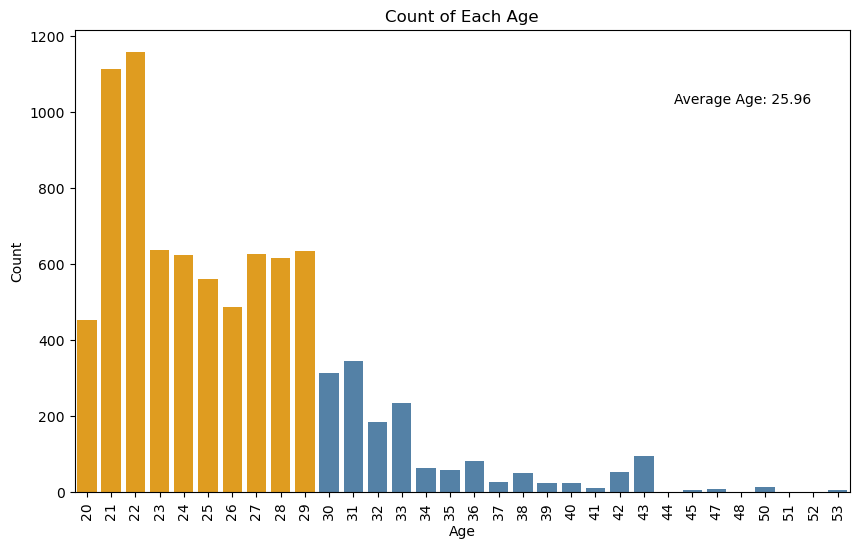

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already defined the age_counts and average_age variables

# Plot the result
plt.figure(figsize=(10, 6))
# Set the color for the first 10 bars as orange
colors = ['orange' if i < 10 else 'steelblue' for i in range(len(age_counts))]
sns.barplot(x=age_counts.index, y=age_counts.values, palette=colors)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Count of Each Age')
plt.text(0.95, 0.85, f'Average Age: {average_age:.2f}', ha='right', va='center', transform=plt.gca().transAxes)
plt.xticks(rotation=90)
plt.show()

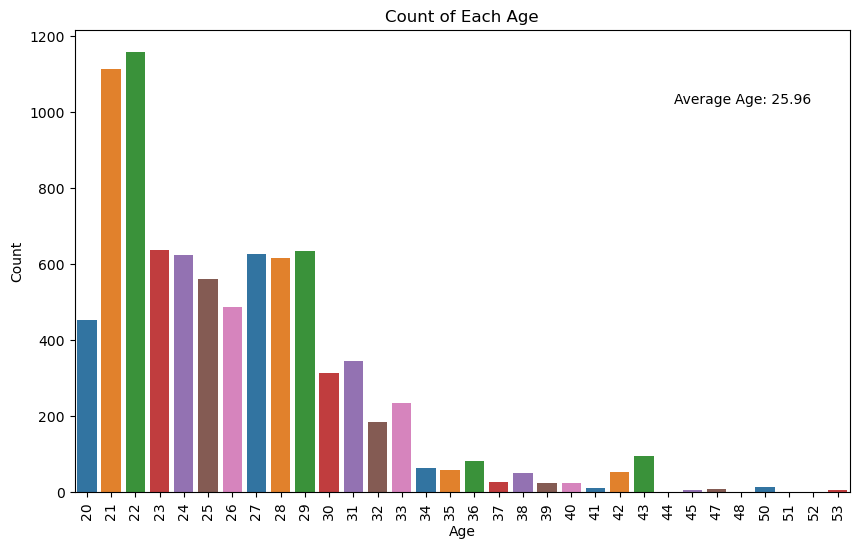

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a darker color palette
dark_palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2"]

# Plot the result with the darker color palette
plt.figure(figsize=(10, 6))
sns.barplot(x=age_counts.index, y=age_counts.values, palette=dark_palette)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Count of Each Age')
plt.text(0.95, 0.85, f'Average Age: {average_age:.2f}', ha='right', va='center', transform=plt.gca().transAxes)
plt.xticks(rotation=90)
plt.show()

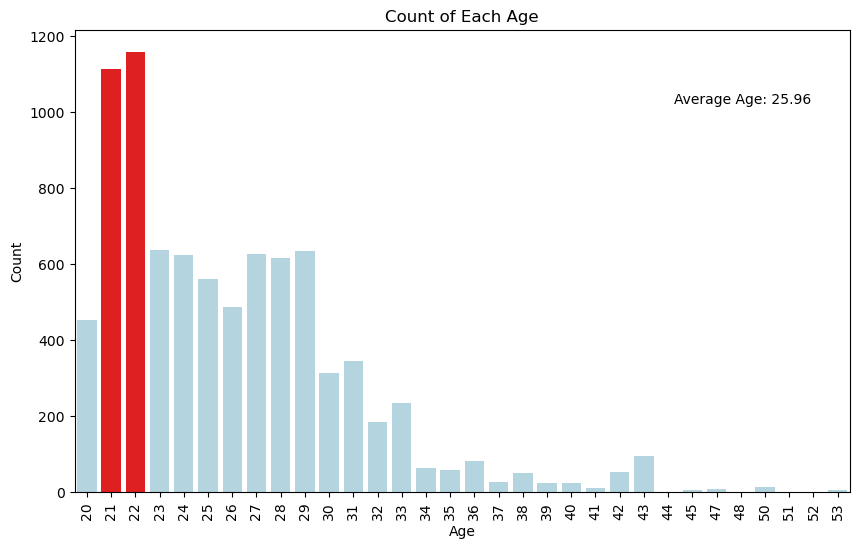

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the two highest count values
highest_counts = age_counts.nlargest(2).values

# Set the colors for the bars with the highest counts and the remaining bars
colors = ['red' if count in highest_counts else 'lightblue' for count in age_counts.values]

# Plot the result with customized colors
plt.figure(figsize=(10, 6))
sns.barplot(x=age_counts.index, y=age_counts.values, palette=colors)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Count of Each Age')
plt.text(0.95, 0.85, f'Average Age: {average_age:.2f}', ha='right', va='center', transform=plt.gca().transAxes)
plt.xticks(rotation=90)
plt.show()



## Me 


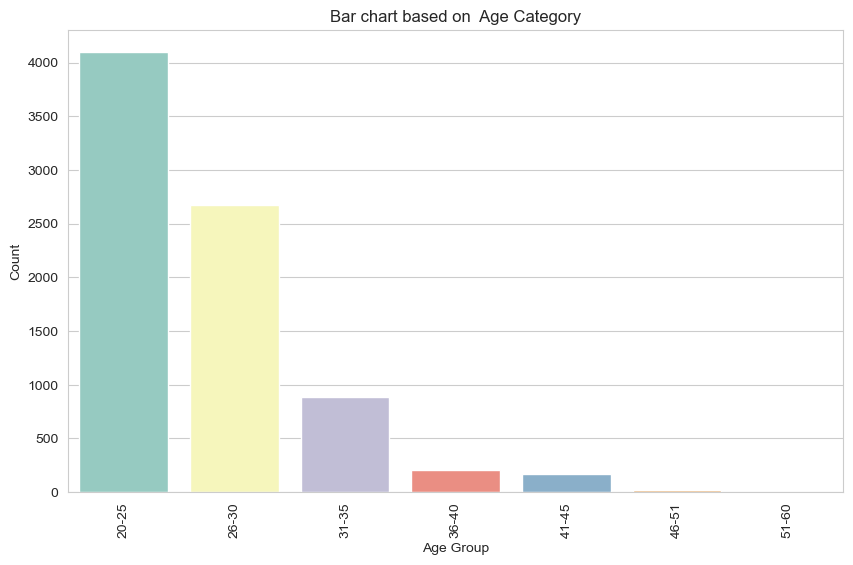

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the age group labels
age_groups = ['20-25', '26-30', '31-35', '36-40', '41-45', '46-51', '51-60']

# Create age group bins
age_bins = [20, 25, 30, 35, 40, 45, 51, 60]

# Assign age groups to each age
df_clean['Age Group'] = pd.cut(df_clean['age'], bins=age_bins, labels=age_groups)

# Calculate the count of each age group
age_group_counts = df_clean['Age Group'].value_counts().sort_index()

# Set seaborn style
sns.set_style('whitegrid')

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette='Set3')

# Set plot labels and title
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Bar chart based on  Age Category')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

### Bigger font for bar chart

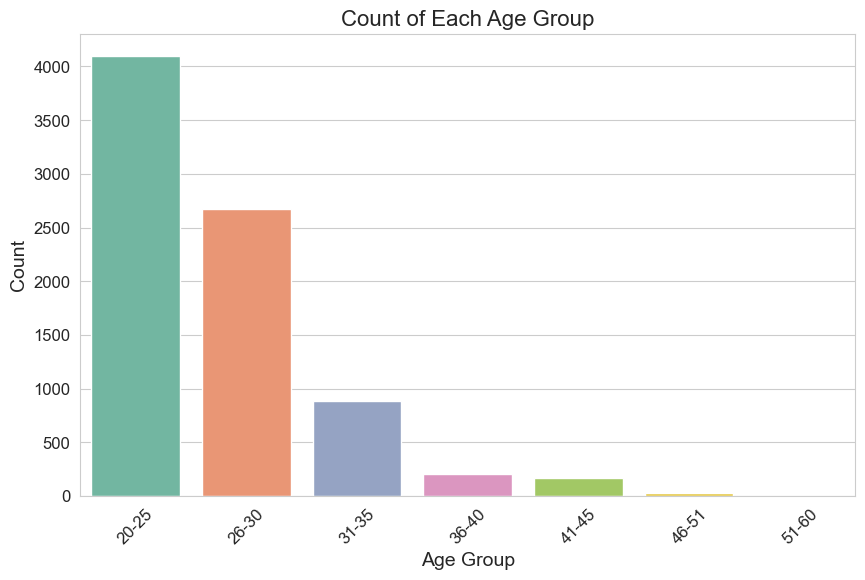

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the age group labels
age_groups = ['20-25', '26-30', '31-35', '36-40', '41-45', '46-51', '51-60']

# Create age group bins
age_bins = [20, 25, 30, 35, 40, 45, 51, 60]

# Assign age groups to each age
df_clean['Age Group'] = pd.cut(df_clean['age'], bins=age_bins, labels=age_groups)

# Calculate the count of each age group
age_group_counts = df_clean['Age Group'].value_counts().sort_index()

# Set seaborn style
sns.set_style('whitegrid')

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette='Set2')

# Set plot labels and title with larger font size
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Count of Each Age Group', fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)

# Set y-axis tick label font size
plt.yticks(fontsize=12)

# Display the plot
plt.show()

# Expreience level

In [85]:
df_clean.head(5)

,jobDescription,keywords,suggestedSkills,header.contact.city,header.contact.state,header.contact.country,summary.text,summary.visible,projects.projects,volunteer.volunteer,...,CourseWork,Certificate Name,Certificate Issuer,Certificate Received on,text_data,dominant_topic,Gyear,YearDifference,age,Age Group
0,Job Posting:\nDo you have a passion for helpin...,admissions representative admissions uma in...,Compliance Client Manages Interaction Finance ...,INDIO,CA,United States,"Detailed and driven, I have built strong commu...",True,[],[],...,'',Qualified Applicator Certificate,California Riverside Agriculture Department,November 2021,admissions representative admissions uma in...,6,2019,4,25,20-25
1,Tasks:\n\nCreation of concepts for dashboard i...,dashboard interfaces lead generation marketi...,Analysis Collection Research,Ilmenau,Thuringia,Germany,Detailed-oriented UI/UX Designer with experien...,True,"[{'link': '', 'title': 'Madinar Pathe App Desi...",[],...,"'Crowdsourcing & Human Computing, User-Centric...",Google UX Design - Foundation of UX Design,Google,May 2022,dashboard interfaces lead generation marketi...,0,2017,6,27,26-30
2,Responsibilities:\n\nWork closely with product...,product design development business require...,Vue DevOps Delivery,Peoria,Arizona,United States,Agile Software Engineer with 2 years of experi...,True,"[{'link': '', 'title': 'AIO Financial Site', '...",[],...,"'Distributed Software Development, Algorithms ...",None,None,None,product design development business require...,0,2020,3,24,20-25
3,What is Talentport :\n\nTalentport connects SE...,flexibility international exposure dream job...,,Malang,,,Innovative digital marketing professional with...,True,[],[],...,"'Marketing Analytics, Product Marketing, Googl...",None,None,None,flexibility international exposure dream job...,5,2020,3,24,20-25
4,Hyperproof is hiring a Product Manager with a ...,product roadmaps new features product enhanc...,Curiosity,Calgary,AB,Canada,Passionate job seeker with strong organization...,True,[],[],...,'',Certified associate in project management (CAPM)®,Project Management Institute,May 2022,product roadmaps new features product enhanc...,0,2021,2,23,20-25


In [86]:
import pandas as pd

# Define the age ranges for each experience level
beginner_range = (20, 25)
intermediate_range = (26, 30)
senior_range = (31, float('inf'))

# Classify people's experience based on their age
df_clean['experience'] = pd.cut(df_clean['age'], bins=[beginner_range[0], intermediate_range[0], senior_range[0], senior_range[1]], labels=['beginner', 'intermediate', 'senior'])

# View the updated DataFrame with the experience column
print(df_clean)

                                          jobDescription  \
0      Job Posting:\nDo you have a passion for helpin...   
1      Tasks:\n\nCreation of concepts for dashboard i...   
2      Responsibilities:\n\nWork closely with product...   
3      What is Talentport :\n\nTalentport connects SE...   
4      Hyperproof is hiring a Product Manager with a ...   
...                                                  ...   
11971  Assist with content ideation and creation, inc...   
11972  This person must excel in a fast-paced environ...   
11973  In collaboration with the Senior Communication...   
11974  About the job\nYou’ve got 52 weeks a year to f...   
11975  About InsideTracker\n\nCreated by experts in a...   

                                                keywords  \
0      admissions representative  admissions  uma  in...   
1      dashboard interfaces  lead generation  marketi...   
2      product  design  development  business require...   
3      flexibility  international expos

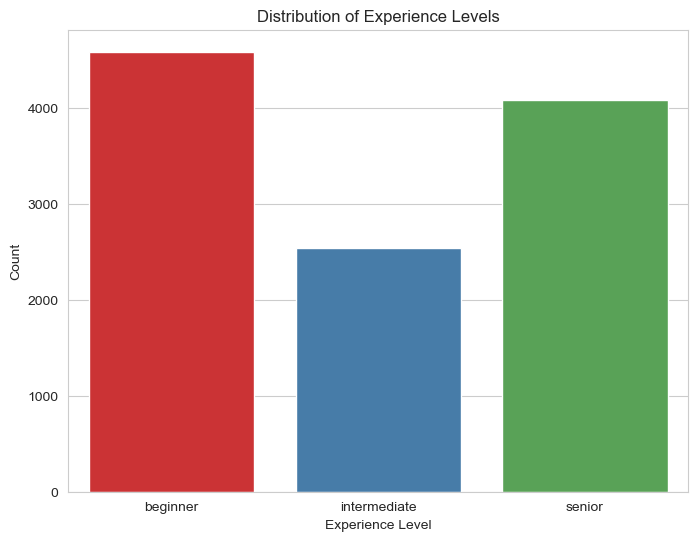

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of experience levels
plt.figure(figsize=(8, 6))
sns.countplot(x='experience', data=df_clean, palette='Set1')
plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.title('Distribution of Experience Levels')
plt.show()

In [88]:
import pandas as pd

# Create a new column 'ExperienceLevel' and initialize it with empty strings
df_clean['ExperienceLevel'] = ''

# Define the conditions and corresponding labels for each experience level
conditions = [
    (df_clean['YearDifference'] >= 0) & (df_clean['YearDifference'] <= 2),
    (df_clean['YearDifference'] > 2) & (df_clean['YearDifference'] <= 5),
    (df_clean['YearDifference'] > 5) & (df_clean['YearDifference'] <= 10),
    (df_clean['YearDifference'] > 10) & (df_clean['YearDifference'] <= 20),
    (df_clean['YearDifference'] > 20)
]

labels = ['Entry', 'Early_career', 'Mid_career', 'Experienced', 'Senior']

# Assign the corresponding labels based on the conditions
df_clean['ExperienceLevel'] = pd.cut(df_clean['YearDifference'], bins=[0, 2, 5, 10, 20, float('inf')], labels=labels)

# Print the updated DataFrame
print(df_clean)

                                          jobDescription  \
0      Job Posting:\nDo you have a passion for helpin...   
1      Tasks:\n\nCreation of concepts for dashboard i...   
2      Responsibilities:\n\nWork closely with product...   
3      What is Talentport :\n\nTalentport connects SE...   
4      Hyperproof is hiring a Product Manager with a ...   
...                                                  ...   
11971  Assist with content ideation and creation, inc...   
11972  This person must excel in a fast-paced environ...   
11973  In collaboration with the Senior Communication...   
11974  About the job\nYou’ve got 52 weeks a year to f...   
11975  About InsideTracker\n\nCreated by experts in a...   

                                                keywords  \
0      admissions representative  admissions  uma  in...   
1      dashboard interfaces  lead generation  marketi...   
2      product  design  development  business require...   
3      flexibility  international expos

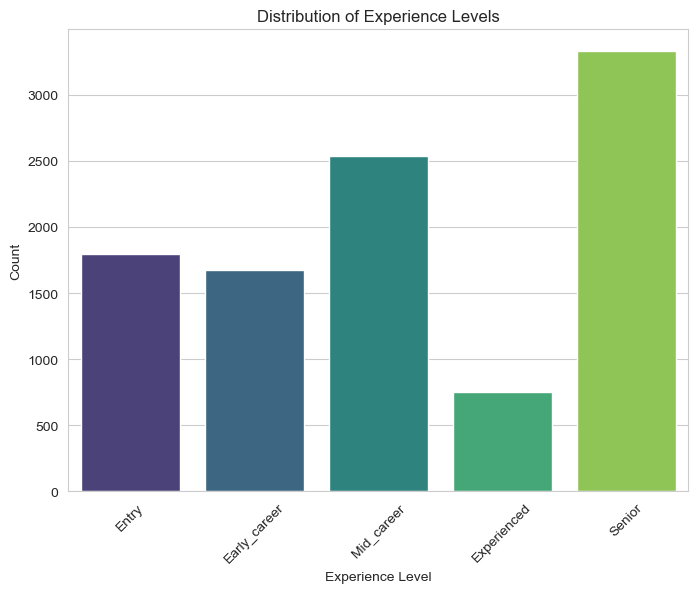

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the conditions and corresponding labels for each experience level
conditions = [
    (df_clean['YearDifference'] >= 0) & (df_clean['YearDifference'] <= 2),
    (df_clean['YearDifference'] > 2) & (df_clean['YearDifference'] <= 5),
    (df_clean['YearDifference'] > 5) & (df_clean['YearDifference'] <= 10),
    (df_clean['YearDifference'] > 10) & (df_clean['YearDifference'] <= 20),
    (df_clean['YearDifference'] > 20)
]

labels = ['Entry', 'Early_career', 'Mid_career', 'Experienced', 'Senior']

# Create a new column 'ExperienceLevel' and assign the corresponding labels based on the conditions
df_clean['ExperienceLevel'] = pd.cut(df_clean['YearDifference'], bins=[0, 2, 5, 10, 20, float('inf')], labels=labels)


# Count the number of individuals in each experience level
experience_counts = df_clean['ExperienceLevel'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=experience_counts.index, y=experience_counts.values, palette='viridis')

# Add labels and title
plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.title('Distribution of Experience Levels')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [93]:
import numpy as np

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the conditions and corresponding labels for each experience level
conditions = [
    (df_clean['YearDifference'] >= 0) & (df_clean['YearDifference'] <= 2),
    (df_clean['YearDifference'] > 2) & (df_clean['YearDifference'] <= 5),
    (df_clean['YearDifference'] > 5) & (df_clean['YearDifference'] <= 10),
    (df_clean['YearDifference'] > 10) & (df_clean['YearDifference'] <= 20),
    (df_clean['YearDifference'] > 20)
]

In [95]:
labels = ['Entry', 'Early_career', 'Mid_career', 'Experienced', 'Senior']

In [96]:
# Create a new column 'ExperienceLevel' and assign the corresponding labels based on the conditions
df_clean['ExperienceLevel'] = np.select(conditions, labels, default=None)

In [97]:
df_clean['ExperienceLevel'].head(5)

0    Early_career
1      Mid_career
2    Early_career
3    Early_career
4           Entry
Name: ExperienceLevel, dtype: object

In [98]:
# Create a new column 'ExperienceLevel' and assign the corresponding labels based on the conditions
df_clean['ExperienceLevel'] = pd.cut(df_clean['YearDifference'], bins=[0, 2, 5, 10, 20, float('inf')], labels=labels)


In [99]:
# Count the number of individuals in each experience level
experience_counts = df_clean['ExperienceLevel'].value_counts()
experience_counts

Senior          3327
Mid_career      2536
Entry           1796
Early_career    1673
Experienced      755
Name: ExperienceLevel, dtype: int64

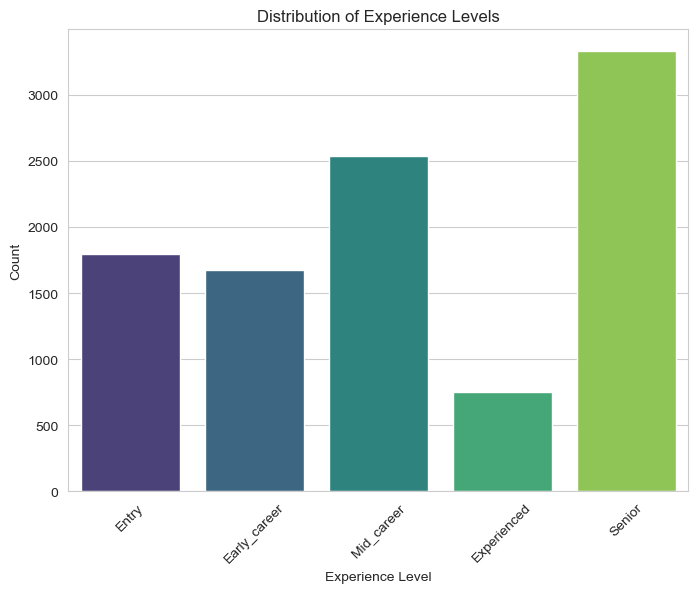

In [100]:
# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=experience_counts.index, y=experience_counts.values, palette='viridis')

# Add labels and title
plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.title('Distribution of Experience Levels')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the plot
plt.show()


# Research Q4: Trends in experience and skills

In [130]:
df = pd.read_csv ('Cleaned_data.csv')
df_org = df

In [131]:
df.head()

,jobDescription,keywords,suggestedSkills,header.contact.city,header.contact.state,header.contact.country,summary.text,summary.visible,projects.projects,volunteer.volunteer,...,Exp_start_date,Exp_description,GPA,School,Program,GraduationDate,CourseWork,Certificate Name,Certificate Issuer,Certificate Received on
0,Job Posting:\nDo you have a passion for helpin...,"['admissions representative', ' admissions', '...","['Compliance', 'Client', 'Manages', 'Interacti...",INDIO,CA,United States,"Detailed and driven, I have built strong commu...",True,[],[],...,November 2021,• Ensures timely submission of all required re...,'','Cal Poly Pomona','Business Management and Human Resources','June 2019','',Qualified Applicator Certificate,California Riverside Agriculture Department,November 2021
1,Tasks:\n\nCreation of concepts for dashboard i...,"['dashboard interfaces', ' lead generation', '...","['Analysis', 'Collection', 'Research']",Ilmenau,Thuringia,Germany,Detailed-oriented UI/UX Designer with experien...,True,"[{'link': '', 'title': 'Madinar Pathe App Desi...",[],...,April 2020,• Standardized best practices for desirable ou...,"'', ''","'TU Ilmenau', 'BRAC University'","""Master's in Media Technology "", 'Electrical &...","'September 2024', 'April 2017'","'Crowdsourcing & Human Computing, User-Centric...",Google UX Design - Foundation of UX Design,Google,May 2022
2,Responsibilities:\n\nWork closely with product...,"['product', ' design', ' development', ' busin...","['Vue', 'DevOps', 'Delivery']",Peoria,Arizona,United States,Agile Software Engineer with 2 years of experi...,True,"[{'link': '', 'title': 'AIO Financial Site', '...",[],...,November 2021,• Tested and developed tier 3 production suppo...,'3.61/4.00','Arizona State University','Bachelor of Science','December 2020',"'Distributed Software Development, Algorithms ...",NaN,NaN,NaN
3,What is Talentport :\n\nTalentport connects SE...,"['flexibility', ' international exposure', ' d...",[],Malang,NaN,NaN,Innovative digital marketing professional with...,True,[],[],...,September 2022,• Coordinated top-level CRM strategy and best ...,"'', '3.58'","'RevoU', 'Malang State Polytechnic'","'Full Stack Digital Marketing', 'Bachelor of A...","'April 2021', 'September 2020'","'Marketing Analytics, Product Marketing, Googl...",NaN,NaN,NaN
4,Hyperproof is hiring a Product Manager with a ...,"['product roadmaps', ' new features', ' produc...",['Curiosity'],Calgary,AB,Canada,Passionate job seeker with strong organization...,True,[],[],...,June 2022,• Assisted Customers in developing product roa...,'','University of British Columbia','Bachelors of Arts- Geography','June 2021','',Certified associate in project management (CAPM)®,Project Management Institute,May 2022


In [132]:
df.shape

(5610, 27)

In [133]:
df.isnull().sum()

jobDescription                  2
keywords                       19
suggestedSkills                 0
header.contact.city           481
header.contact.state         1074
header.contact.country        612
summary.text                 1407
summary.visible                 0
projects.projects               0
volunteer.volunteer             0
experience.experience           0
publications.publications       0
Skills                       1396
Exp_job_title                 619
company                       590
Exp_end_date                 1164
Exp_location                 1031
Exp_start_date                648
Exp_description               657
GPA                           666
School                        666
Program                       666
GraduationDate                666
CourseWork                    666
Certificate Name             3236
Certificate Issuer           3462
Certificate Received on      3493
dtype: int64

In [134]:
df["Exp_start_date"].str.split(" ")

0        [November, 2021]
1           [April, 2020]
2        [November, 2021]
3       [September, 2022]
4            [June, 2022]
              ...        
5605     [December, 2022]
5606      [January, 2022]
5607       [August, 2022]
5608         [June, 2022]
5609    [September, 2016]
Name: Exp_start_date, Length: 5610, dtype: object

In [135]:
df["Exp_start_month"] = df["Exp_start_date"].str.split(" ").str[0]
df["Exp_start_year"] = df["Exp_start_date"].str.split(" ").str[1]

In [136]:
years= df["Exp_start_year"].value_counts()

In [137]:
# Export the DataFrame to a new CSV file
df.to_csv('new_filename1.csv', index=False)

In [138]:
year_count = pd.DataFrame(years)
year_count.reset_index()
year_count = year_count.reset_index().rename(columns={'index': 'Exp_start_year',"Exp_start_year": "count"})
year_count = year_count[year_count['count'] >= 3]
year_count

,Exp_start_year,count
0,2022,1867
1,2021,1092
2,2020,511
3,2023,398
4,2019,387
5,2017,183
6,2018,181
7,2016,87
8,2015,64
9,2014,42


Text(0, 0.5, 'Count')

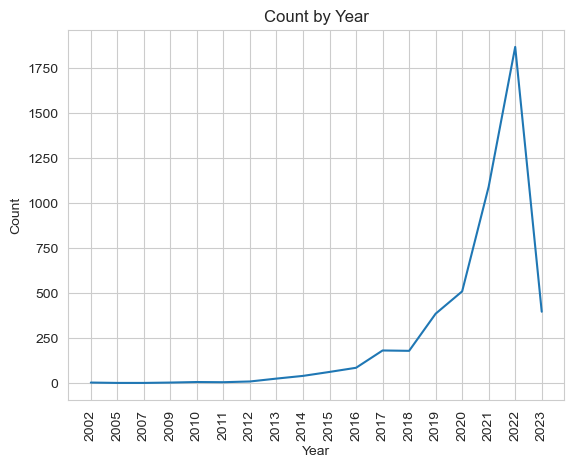

In [139]:
year_count = year_count.sort_values('Exp_start_year')
sns.lineplot(data=year_count, x= 'Exp_start_year', y='count')

# set the title and axis labels
plt.title('Count by Year')
plt.xlabel('Year')
plt.xticks(rotation=90)
plt.ylabel('Count')

In [140]:
months=df["Exp_start_month"].value_counts()
months

January       608
June          537
August        481
September     446
March         441
November      427
May           401
July          348
October       341
April         336
February      278
December      244
2014           16
2020           12
2021           10
06/13/2021      7
                3
24/04/2021      2
1st             2
2019            2
2022            2
11/14/2016      2
01/01/2019      1
2023            1
06/01/2021      1
3/2017          1
06/2015         1
08/2019         1
06/2019         1
23/10/2021      1
29/4/2019       1
2006            1
2015            1
2018            1
2017            1
01/2022         1
02/2020         1
11/2016         1
Name: Exp_start_month, dtype: int64

In [141]:
month_count = pd.DataFrame(months)
month_count.reset_index()
month_count = month_count.reset_index().rename(columns={'index': 'Exp_start_month',"Exp_start_month": "count"})
month_count = month_count[month_count['count'] >= 20]
month_count = month_count.sort_values("Exp_start_month")
month_count

,Exp_start_month,count
9,April,336
2,August,481
11,December,244
10,February,278
0,January,608
7,July,348
1,June,537
4,March,441
6,May,401
5,November,427


In [142]:
month_dict = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
month_count['month_num'] = month_count['Exp_start_month'].map(month_dict)
month_count = month_count.sort_values('month_num')
month_count = month_count.drop('month_num', axis=1)
month_count

,Exp_start_month,count
0,January,608
10,February,278
4,March,441
9,April,336
6,May,401
1,June,537
7,July,348
2,August,481
3,September,446
8,October,341


Text(0, 0.5, 'Count')

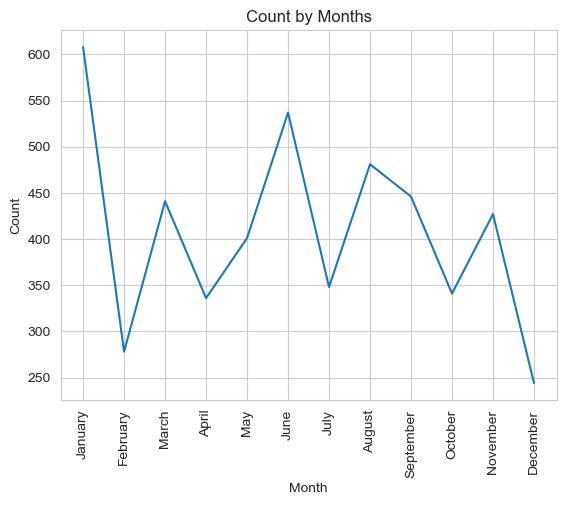

In [143]:
sns.lineplot(data=month_count, x= 'Exp_start_month', y='count')

# set the title and axis labels
plt.title('Count by Months')
plt.xlabel('Month')
plt.xticks(rotation=90)
plt.ylabel('Count')

Text(0, 0.5, 'Count')

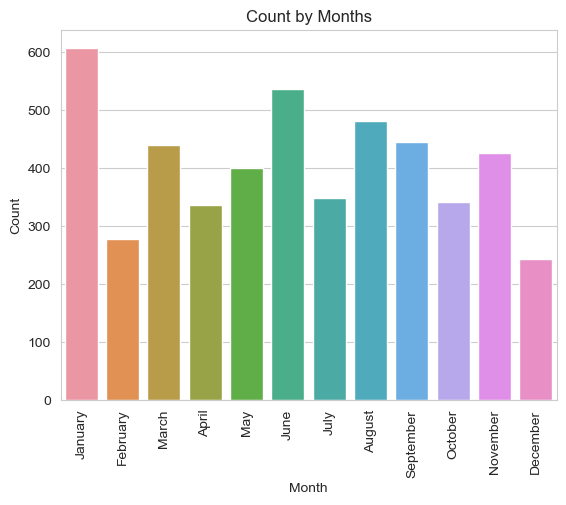

In [144]:
sns.barplot(data=month_count, x= 'Exp_start_month', y='count')

# set the title and axis labels
plt.title('Count by Months')
plt.xlabel('Month')
plt.xticks(rotation=90)
plt.ylabel('Count')

In [145]:
df_plot = month_count
df_plot = df_plot.sort_values('count', ascending=False)
df_plot

,Exp_start_month,count
0,January,608
1,June,537
2,August,481
3,September,446
4,March,441
5,November,427
6,May,401
7,July,348
8,October,341
9,April,336


In [146]:
df_plot['cumsum'] = df_plot['count'].cumsum()
df_plot

,Exp_start_month,count,cumsum
0,January,608,608
1,June,537,1145
2,August,481,1626
3,September,446,2072
4,March,441,2513
5,November,427,2940
6,May,401,3341
7,July,348,3689
8,October,341,4030
9,April,336,4366


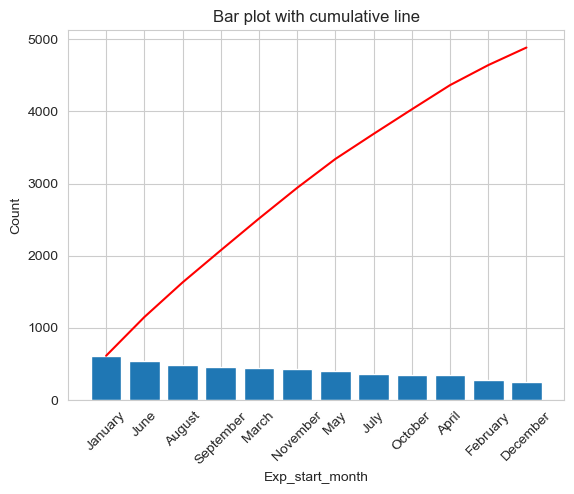

In [147]:
fig, ax = plt.subplots()

# Plot the bar chart
ax.bar(df_plot['Exp_start_month'], df_plot['count'])

# Plot the cumulative sum line chart
ax.plot(df_plot['Exp_start_month'],df_plot['cumsum'], color='red')

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Add labels and title
ax.set_xlabel('Exp_start_month')
ax.set_ylabel('Count')
ax.set_title('Bar plot with cumulative line')

# Display the plot
plt.show()

In [148]:
df['Exp_job_title'].value_counts().head()

Lead Quality Assurance Engineer     66
Client Success Specialist           60
Photographer & Editor               56
Outbound Sales Agent                52
Digital Marketing Manager           49
Name: Exp_job_title, dtype: int64

In [149]:
# Drop rows where the value in the 'Column_name' column meets a specific condition
dfs = df[df['Skills'] != '']
skills = dfs['Skills'].dropna()

In [150]:
skills

0       'Jobber, Glorilladesk, Billmaster Software, As...
1       'User research methodologies, Information arch...
2       'JavaScript, React, Cypress, SQL, C#, PHP, Pyt...
3       'Marketing Analytics, Website Analytics, Produ...
4       'Client relations, interpersonal communication...
                              ...                        
5604    'HTML, CSS, Bootstrap, JavaScript, PHP, MySQL'...
5605    'HTML, CSS, JavaScript, TypeScript, Vue.js, Re...
5606    'Adobe Illustrator, Adobe Photoshop, Adobe Pre...
5607    'In - Person and Hybrid Event Production, Proj...
5608    'Java, Python, PowerShell, HTML, BASH, PL/SQL,...
Name: Skills, Length: 4214, dtype: object

In [151]:
from collections import Counter

def determine_skill_trends(skills_list):
    # Concatenate all the skills into a single string
    skills_text = ''
    for skill in skills_list:
        if isinstance(skill, str) and skill.strip():
            skills_text += skill.strip() + ','

    # Split the skills text into individual skills
    individual_skills = skills_text.split(',')

    # Remove leading/trailing whitespaces from each skill
    individual_skills = [skill.strip() for skill in individual_skills]

    # Count the occurrences of each skill
    skill_counts = Counter(individual_skills)

    # Sort the skills based on their frequency
    sorted_skills = sorted(skill_counts.items(), key=lambda x: x[1], reverse=True)

    # Create a DataFrame from the skill counts
    skill_trends = pd.DataFrame(sorted_skills[:10], columns=['Skill', 'Count'])

    return skill_trends

In [152]:
skill_trends = determine_skill_trends(skills)
skill_trends

,Skill,Count
0,'',1566
1,Excel,486
2,JavaScript,407
3,CSS,376
4,'Python,362
5,Word,333
6,PowerPoint,331
7,Python,326
8,SQL,300
9,HTML,290


In [153]:
if skill_trends is not None:
    # Remove the row with '' value in the 'Skill' column
    skill_trends = skill_trends.drop(skill_trends[skill_trends['Skill'] == "''"].index)
    
    # Reset the index of the DataFrame
    skill_trends = skill_trends.reset_index(drop=True)
    # Rename "'Python" to "Python"
    skill_trends['Skill'] = skill_trends['Skill'].replace("'Python", "Python")
    print(skill_trends)
else:
    print("No skill trends found.")


        Skill  Count
0       Excel    486
1  JavaScript    407
2         CSS    376
3      Python    362
4        Word    333
5  PowerPoint    331
6      Python    326
7         SQL    300
8        HTML    290


Text(0, 0.5, 'Count')

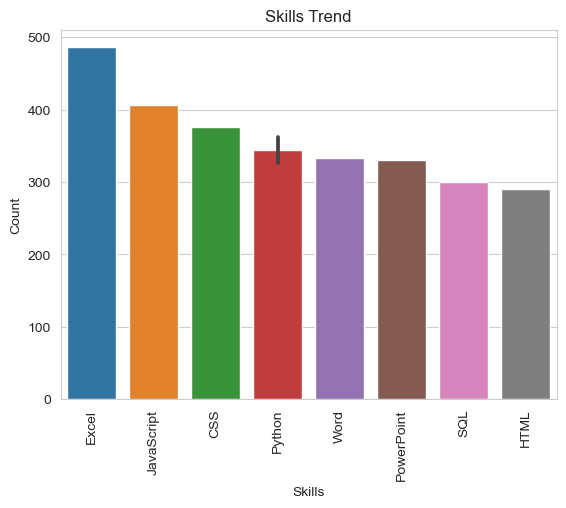

In [154]:
sns.barplot(data=skill_trends, x= 'Skill', y='Count')

# set the title and axis labels
plt.title('Skills Trend')
plt.xlabel('Skills')
plt.xticks(rotation=90)
plt.ylabel('Count')

In [155]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Remove unwanted entries in the year column
df['Exp_start_year'] = df['Exp_start_year'].astype(str)
df = df[df['Exp_start_year'].str.match(r'^\d{4}$')]

# Get unique years from the dataset and sort them
years = sorted(df['Exp_start_year'].unique())

# Create a dropdown widget for year selection
year_dropdown = widgets.Dropdown(
    options=years,
    description='Select Year:'
)

# Define a function to update the filtered skills based on the selected year
def filter_skills_by_year(year):
    filtered_skills = df[df['Exp_start_year'] == year]['Skills'].dropna()
    with output:
        clear_output()
        display(filtered_skills)

# Define an event handler for the dropdown widget
def on_dropdown_change(change):
    year = change['new']
    filter_skills_by_year(year)

# Register the event handler
year_dropdown.observe(on_dropdown_change, names='value')

# Create an output widget for displaying the filtered skills
output = widgets.Output()

# Display the dropdown widget and the output widget
display(year_dropdown)
display(output)

# Initialize the display with the first year's filtered skills
filter_skills_by_year(year_dropdown.value)

Series([], Name: Skills, dtype: object)

,Skill,Count
0,Excel,47
1,HTML,40
2,CSS,37
3,Trello,29
4,JavaScript,29
5,Salesforce,25
6,Javascript,25
7,Google Analytics,23
8,Word,21
9,Jira,21


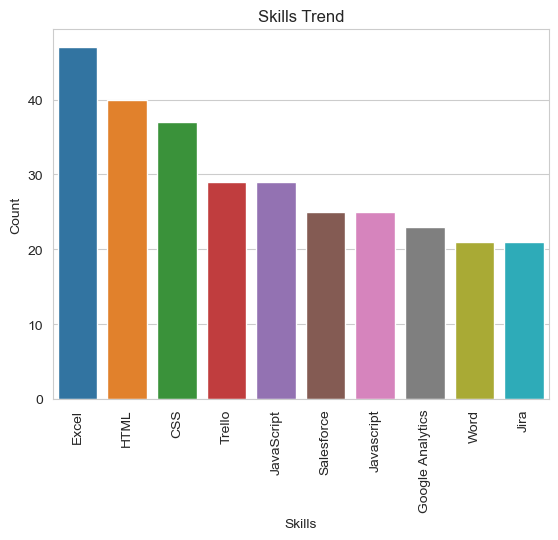

In [156]:
import pandas as pd
import ipywidgets as widgets
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
from collections import Counter
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Remove unwanted entries in the year column
df['Exp_start_year'] = df['Exp_start_year'].astype(str)
df = df[df['Exp_start_year'].str.match(r'^\d{4}$')]

# Create a function to extract skills from the skills text and remove stopwords
def extract_skills(skills_text):
    delimiters = r'[,|\t|\n|\']|\.\s|•\s'
    skills = [skill.strip() for skill in re.split(delimiters, skills_text) if skill.strip()]
    stop_words = set(stopwords.words('english'))
    skills = [skill for skill in skills if skill.lower() not in stop_words]
    return skills

# Get unique years from the dataset and sort them
years = sorted(df[df['Exp_start_year'].astype(int) >= 2017]['Exp_start_year'].unique())

# Create a dropdown widget for year selection
year_dropdown = widgets.Dropdown(
    options=years,
    description='Select Year:'
)

# Define a function to update the filtered skills and skill trends based on the selected year
def filter_skills_by_year(year):
    filtered_skills = df[df['Exp_start_year'] == year]['Skills'].dropna()
    skill_counts = Counter()
    
    for skills_text in filtered_skills:
        skills = extract_skills(skills_text)
        skill_counts.update(skills)
    
    skill_trends = pd.DataFrame(skill_counts.most_common(10), columns=['Skill', 'Count'])
    
    with output:
        clear_output()
        if not skill_trends.empty:
            # Remove the row with '' value in the 'Skill' column
            skill_trends = skill_trends.drop(skill_trends[skill_trends['Skill'] == "''"].index)
            
            # Reset the index of the DataFrame
            skill_trends = skill_trends.reset_index(drop=True)
            # Rename "'Python" to "Python"
            skill_trends['Skill'] = skill_trends['Skill'].replace("'Python", "Python")
            display(skill_trends)
            
            # Plot the bar plot
            sns.barplot(data=skill_trends, x='Skill', y='Count')
            # Set the title and axis labels
            plt.title('Skills Trend')
            plt.xlabel('Skills')
            plt.xticks(rotation=90)
            plt.ylabel('Count')
            plt.show()
        else:
            print("No skill trends found for the selected year.")

# Define an event handler for the dropdown widget
def on_dropdown_change(change):
    year = change['new']
    filter_skills_by_year(year)

# Register the event handler
year_dropdown.observe(on_dropdown_change, names='value')

# Create an output widget for displaying the skill trends
output = widgets.Output()

# Display the dropdown widget and the output widget
display(year_dropdown)
display(output)

# Initialize the display with the first year's filtered skills and skill trends
filter_skills_by_year(year_dropdown.value)


# Research Q2: Good and bad resume

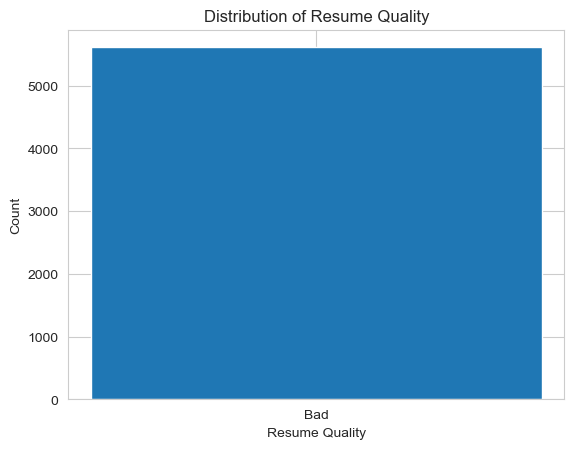

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv("Cleaned_data.csv")

# Create the education column by combining GPA, School, Program, and GraduationDate
data['education'] = data['GPA'] + ' ' + data['School'] + ' ' + data['Program'] + ' ' + data['GraduationDate']

# Handle NaN values in resume_text column
data['resume_text'] = data['keywords'].fillna('') + ' ' + data['suggestedSkills'].fillna('')

# Create a function to check if a resume is good or bad
def check_resume(row):
    # Check important sections
    if pd.isna(row['experience.experience']) or pd.isna(row['education']):
        return "Bad"  # Missing important sections
    
    # Check resume length
    resume_length = len(str(row['resume_text']).split())
    if resume_length < 300 or resume_length > 500:
        return "Bad"  # Outside the recommended range
    
    # Check use of action verbs
    action_verbs = ['achieved', 'created', 'developed', 'managed', 'led', 'implemented']
    for verb in action_verbs:
        if verb in str(row['resume_text']):
            break
    else:
        return "Bad"  # No action verbs found
    
    # Check for pronouns
    pronouns = ['I', 'we', 'me']
    for pronoun in pronouns:
        if pronoun in str(row['resume_text']).lower():
            break
    else:
        return "Bad"  # No pronouns found
    
    # Check excessive sentence or bullet length
    sentences = str(row['resume_text']).split('. ')
    for sentence in sentences:
        if len(sentence.split()) > 20:
            return "Bad"  # Excessive sentence or bullet length
    
    return "Good"  # All conditions passed, resume is good

# Apply the check_resume function to each row of the DataFrame
data['resume_quality'] = data.apply(check_resume, axis=1)

# Save the updated data to a new CSV file
data.to_csv("Cleaned_data_with_quality.csv", index=False)

# Count the number of good and bad resumes
resume_counts = data['resume_quality'].value_counts()

# Create a bar chart
plt.bar(resume_counts.index, resume_counts.values)
plt.xlabel('Resume Quality')
plt.ylabel('Count')
plt.title('Distribution of Resume Quality')
plt.show()


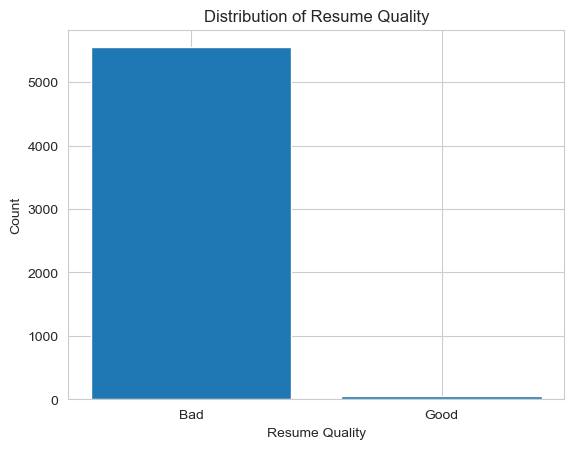

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv("Cleaned_data.csv")

# Create the education column by combining GPA, School, Program, and GraduationDate
data['education'] = data['GPA'] + ' ' + data['School'] + ' ' + data['Program'] + ' ' + data['GraduationDate']

# Handle NaN values in resume_text column
data['resume_text'] = data['jobDescription'].fillna('') + ' ' + data['keywords'].fillna('') + ' ' + data['suggestedSkills'].fillna('')

# Create a function to check if a resume is good or bad
def check_resume(row):
    # Check important sections
    if pd.isna(row['experience.experience']) or pd.isna(row['education']) or pd.isna(row['projects.projects']):
        return "Bad"  # Missing important sections
    
    # Check excessive bullet points
    bullet_points = str(row['projects.projects']).count('•')
    if bullet_points > 10:
        return "Bad"  # Too many bullet points
    
    # Check spelling mistakes
    if 'spelling mistake' in str(row['resume_text']):
        return "Bad"  # Spelling mistakes found
    
    # Check excessive sentence or bullet length
    sentences = str(row['resume_text']).split('. ')
    for sentence in sentences:
        if len(sentence.split()) > 20:
            return "Bad"  # Excessive sentence or bullet length
    
    return "Good"  # All conditions passed, resume is good

# Apply the check_resume function to each row of the DataFrame
data['resume_quality'] = data.apply(check_resume, axis=1)

# Save the updated data to a new CSV file
data.to_csv("Cleaned_data_with_quality.csv", index=False)

# Count the number of good and bad resumes
resume_counts = data['resume_quality'].value_counts()

# Create a bar chart
plt.bar(resume_counts.index, resume_counts.values)
plt.xlabel('Resume Quality')
plt.ylabel('Count')
plt.title('Distribution of Resume Quality')
plt.show()


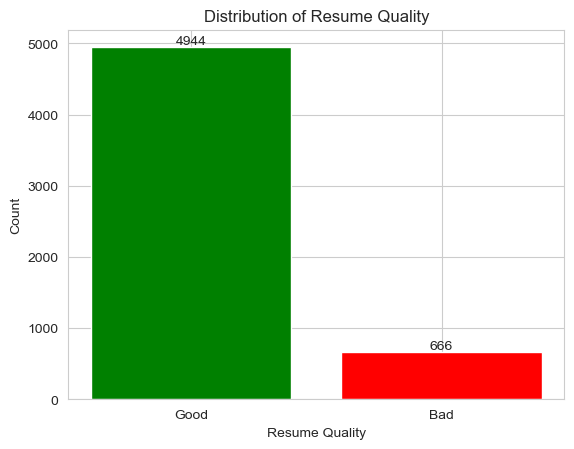

In [159]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv("Cleaned_data.csv")

# Create the education column by combining GPA, School, Program, and GraduationDate
data['education'] = data['GPA'] + ' ' + data['School'] + ' ' + data['Program'] + ' ' + data['GraduationDate']

# Handle NaN values in resume_text column
data['resume_text'] = data['keywords'].fillna('') + data['suggestedSkills'].fillna('')

# Create a function to check if a resume is good or bad
def check_resume(row):
    # Check for missing important sections
    if pd.isna(row['experience.experience']) or pd.isna(row['education']) or pd.isna(row['projects.projects']):
        return "Bad"  # Missing important sections
    
    # Check excessive bullet points
    if pd.notna(row['projects.projects']):
        bullet_points = len(str(row['projects.projects']).split('\n'))
        if bullet_points > 10:
            return "Bad"  # Too many bullet points
    
    return "Good"  # All other conditions ignored, resume is good

# Apply the check_resume function to each row of the DataFrame
data['resume_quality'] = data.apply(check_resume, axis=1)

# Save the updated data to a new CSV file
data.to_csv("Cleaned_data_with_quality.csv", index=False)

# Count the number of good and bad resumes
resume_counts = data['resume_quality'].value_counts()

# Set custom bar colors
colors = ['green', 'red']

# Create a bar chart
plt.bar(resume_counts.index, resume_counts.values, color=colors)

# Add count labels on top of each bar
for i, count in enumerate(resume_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.xlabel('Resume Quality')
plt.ylabel('Count')
plt.title('Distribution of Resume Quality')

# Set custom labels for x-axis
plt.xticks(range(len(resume_counts.index)), resume_counts.index)

plt.show()


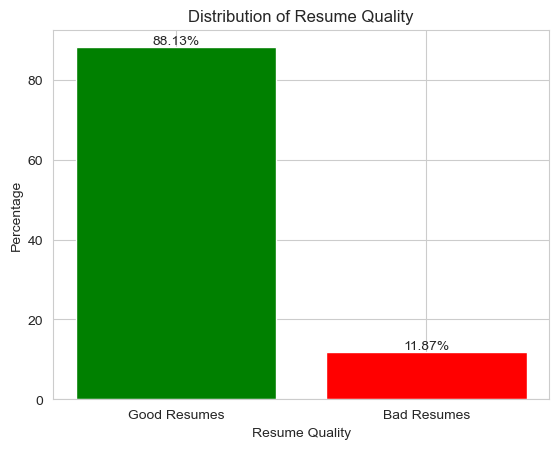

In [160]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv("Cleaned_data.csv")

# Create the education column by combining GPA, School, Program, and GraduationDate
data['education'] = data['GPA'] + ' ' + data['School'] + ' ' + data['Program'] + ' ' + data['GraduationDate']

# Handle NaN values in resume_text column
data['resume_text'] = data['keywords'].fillna('') + data['suggestedSkills'].fillna('')

# Create a function to check if a resume is good or bad
def check_resume(row):
    # Check for missing important sections
    if pd.isna(row['experience.experience']) or pd.isna(row['education']) or pd.isna(row['projects.projects']):
        return "Bad"  # Missing important sections
    
    # Check excessive bullet points
    if pd.notna(row['projects.projects']):
        bullet_points = len(str(row['projects.projects']).split('\n'))
        if bullet_points > 10:
            return "Bad"  # Too many bullet points
    
    return "Good"  # All other conditions ignored, resume is good

# Apply the check_resume function to each row of the DataFrame
data['resume_quality'] = data.apply(check_resume, axis=1)

# Count the number of good and bad resumes
resume_counts = data['resume_quality'].value_counts()

# Calculate the percentage of good and bad resumes
total_resumes = len(data)
good_resume_percentage = (resume_counts['Good'] / total_resumes) * 100
bad_resume_percentage = (resume_counts['Bad'] / total_resumes) * 100

# Create a bar chart
plt.bar(['Good Resumes', 'Bad Resumes'], [good_resume_percentage, bad_resume_percentage], color=['green', 'red'])

# Add percentage labels on top of each bar
plt.text(0, good_resume_percentage, f"{good_resume_percentage:.2f}%", ha='center', va='bottom')
plt.text(1, bad_resume_percentage, f"{bad_resume_percentage:.2f}%", ha='center', va='bottom')

plt.xlabel('Resume Quality')
plt.ylabel('Percentage')
plt.title('Distribution of Resume Quality')

plt.show()


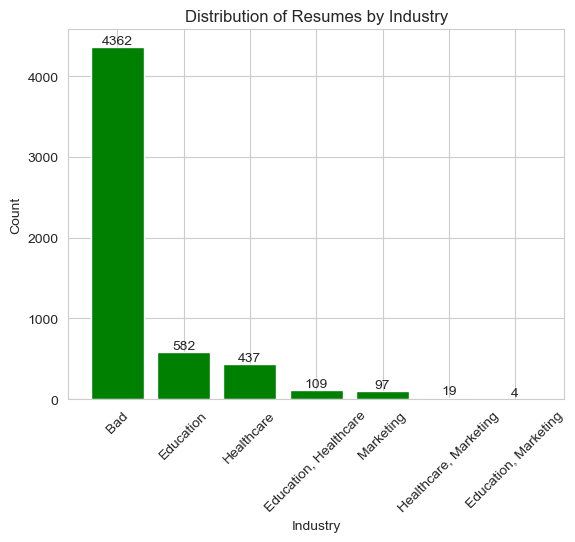

In [161]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv("Cleaned_data.csv")

# Combine keywords and suggestedSkills into a single column
data['resume_text'] = data['keywords'].fillna('') + ' ' + data['suggestedSkills'].fillna('')

# Define industries and their associated keywords
industries = {
    'Education': ['admissions', 'student finance', 'department of education', 'prospective students', 'training', 'enrollment'],
    'Healthcare': ['compliance', 'medical', 'interaction', 'manages'],
    'Marketing': ['lead generation', 'marketing websites', 'website analysis', 'digital products', 'ux understanding', 'figma'],
}

# Create a function to check if a resume is good or bad based on industry keywords
def check_resume(row):
    industry_matches = []
    for industry, keywords in industries.items():
        for keyword in keywords:
            if keyword in row['resume_text'].lower():
                industry_matches.append(industry)
                break
    
    if len(industry_matches) == 0:
        return "Bad"  # No matching industry keywords
    
    return ", ".join(industry_matches)  # Return the matched industries

# Apply the check_resume function to each row of the DataFrame
data['resume_quality'] = data.apply(check_resume, axis=1)

# Count the number of resumes in each industry
industry_counts = data['resume_quality'].value_counts()

# Create a bar chart
plt.bar(industry_counts.index, industry_counts.values, color='green')

# Add exact count labels on top of each bar
for i, count in enumerate(industry_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.xlabel('Industry')
plt.ylabel('Count')
plt.title('Distribution of Resumes by Industry')

plt.xticks(rotation=45)

plt.show()


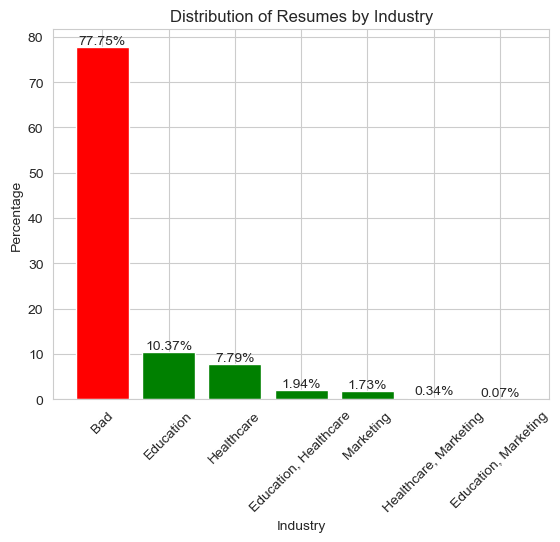

In [162]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv("Cleaned_data.csv")

# Combine keywords and suggestedSkills into a single column
data['resume_text'] = data['keywords'].fillna('') + ' ' + data['suggestedSkills'].fillna('')

# Define industries and their associated keywords
industries = {
    'Education': ['admissions', 'student finance', 'department of education', 'prospective students', 'training', 'enrollment'],
    'Healthcare': ['compliance', 'medical', 'interaction', 'manages'],
    'Marketing': ['lead generation', 'marketing websites', 'website analysis', 'digital products', 'ux understanding', 'figma'],
}

# Create a function to check if a resume is good or bad based on industry keywords
def check_resume(row):
    industry_matches = []
    for industry, keywords in industries.items():
        for keyword in keywords:
            if keyword in row['resume_text'].lower():
                industry_matches.append(industry)
                break
    
    if len(industry_matches) == 0:
        return "Bad"  # No matching industry keywords
    
    return ", ".join(industry_matches)  # Return the matched industries

# Apply the check_resume function to each row of the DataFrame
data['resume_quality'] = data.apply(check_resume, axis=1)

# Calculate the percentage of resumes in each industry
industry_percentages = (data['resume_quality'].value_counts() / len(data)) * 100

# Create a bar chart
colors = ['red' if quality == 'Bad' else 'green' for quality in industry_percentages.index]
plt.bar(industry_percentages.index, industry_percentages.values, color=colors)

# Add exact percentage labels on top of each bar
for i, percentage in enumerate(industry_percentages.values):
    plt.text(i, percentage, f"{percentage:.2f}%", ha='center', va='bottom')

plt.xlabel('Industry')
plt.ylabel('Percentage')
plt.title('Distribution of Resumes by Industry')

plt.xticks(rotation=45)

plt.show()


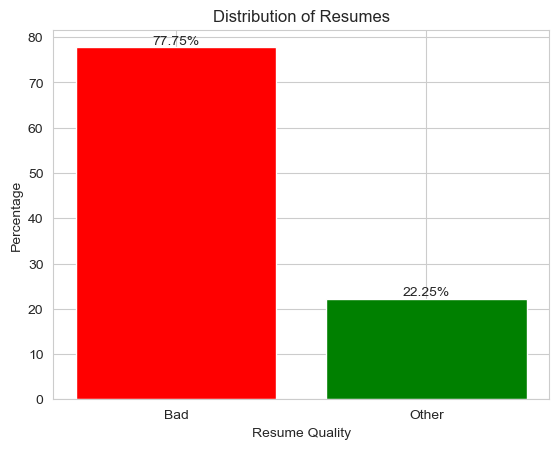

In [163]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv("Cleaned_data.csv")

# Combine keywords and suggestedSkills into a single column
data['resume_text'] = data['keywords'].fillna('') + ' ' + data['suggestedSkills'].fillna('')

# Define industries and their associated keywords
industries = {
    'Education': ['admissions', 'student finance', 'department of education', 'prospective students', 'training', 'enrollment'],
    'Healthcare': ['compliance', 'medical', 'interaction', 'manages'],
    'Marketing': ['lead generation', 'marketing websites', 'website analysis', 'digital products', 'ux understanding', 'figma'],
}

# Create a function to check if a resume is good or bad based on industry keywords
def check_resume(row):
    industry_matches = []
    for industry, keywords in industries.items():
        for keyword in keywords:
            if keyword in row['resume_text'].lower():
                industry_matches.append(industry)
                break
    
    if len(industry_matches) == 0:
        return "Bad"  # No matching industry keywords
    
    return ", ".join(industry_matches)  # Return the matched industries

# Apply the check_resume function to each row of the DataFrame
data['resume_quality'] = data.apply(check_resume, axis=1)

# Count the number of resumes in each category
resume_counts = data['resume_quality'].value_counts()

# Calculate the percentages
total_resumes = resume_counts.sum()
bad_resumes_percentage = (resume_counts['Bad'] / total_resumes) * 100
other_resumes_percentage = ((total_resumes - resume_counts['Bad']) / total_resumes) * 100

# Create a bar chart with two bars
plt.bar(['Bad', 'Other'], [bad_resumes_percentage, other_resumes_percentage], color=['red', 'green'])

# Add exact percentage labels on top of each bar
plt.text(0, bad_resumes_percentage, f"{bad_resumes_percentage:.2f}%", ha='center', va='bottom')
plt.text(1, other_resumes_percentage, f"{other_resumes_percentage:.2f}%", ha='center', va='bottom')

plt.xlabel('Resume Quality')
plt.ylabel('Percentage')
plt.title('Distribution of Resumes')

plt.show()
